# Exploratory Data Analysis on Thyroid Disease Detection Dataset

Dataset Description:

Thyroid disease is a common cause of medical diagnosis and prediction, with an onset that is difficult to forecast in medical research. The thyroid gland is one of our body's most vital organs. Thyroid hormone releases are responsible for metabolic regulation. Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroid that releases thyroid hormones in regulating the rate of body's metabolism.
The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid 
disease or not.

# Import Libraries

In [259]:
# Import Necessary Libraries

# Libraries for Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Machine Learning
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import xgboost as xgb
from xgboost import XGBClassifier
import sklearn.impute
from sklearn.impute import KNNImputer
from kneed import KneeLocator
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Library to maintain Clear Outputs
import warnings
warnings.filterwarnings("ignore")

# Other Libraries
import pickle
import os
import datetime
import sys

Cell 1 - Insights:
1. This cell imports various libraries for data manipulation, visualization, and machine learning model building.
2. Warnings library is also imported so as to suppress any warnings and maintain a clear output.

# Loading of Data

In [140]:
# Load the Dataset
df = pd.read_csv(r"path\to\InputFile.csv")

# Printing the Dataset
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


Cell 2 - Insights:
1. The entire dataset is successfully loaded into a Pandas DataFrame and printed.
2. It is useful to visualize the structure and content of the dataset to understand its columns and values.

In [141]:
# Printing the 1st 10 Entries of the Dataset
df.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative


Cell 3 - Insights:
1. The output displays the first 10 rows of the dataset.
2. Provides a quick overview of the initial entries in the dataset.
3. Useful to check the beginning part of the dataset for any anomalies or inconsistencies.

In [142]:
# Printing the Last 10 Entries of the Dataset
df.tail(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
3762,61,M,f,f,f,f,f,f,f,f,...,t,72,t,0.7,t,103,f,?,other,negative
3763,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3764,54,M,f,f,f,f,f,f,f,f,...,t,89,t,0.85,t,104,f,?,SVI,negative
3765,73,F,t,f,f,f,f,f,f,f,...,t,104,t,1.13,t,92,f,?,SVI,negative
3766,19,F,f,f,f,f,f,f,f,f,...,t,108,t,1.11,t,97,f,?,other,compensated_hypothyroid
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,negative


Cell 4 - Insights:
1. The last 10 rows of the dataset is shown as an output.
2. Offers a look at the end of the dataset, ensuring it is loaded correctly and consistently.

In [143]:
# Printing any random 10 Entries of the Dataset
df.sample(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
2764,73,F,f,f,f,f,f,f,f,f,...,t,74,f,?,f,?,f,?,other,negative
1834,72,M,f,f,f,f,f,f,f,f,...,t,108,t,1.02,t,106,f,?,SVI,negative
3379,33,F,f,f,f,f,f,f,f,f,...,t,51,t,0.88,t,58,f,?,SVI,primary_hypothyroid
1317,29,M,f,f,f,f,f,f,f,f,...,t,127,t,1.14,t,112,f,?,SVHC,negative
2200,72,F,t,f,f,f,f,f,f,f,...,t,174,f,?,f,?,f,?,other,negative
2710,44,F,f,f,f,f,f,f,f,f,...,t,164,t,1.38,t,119,f,?,other,negative
1865,79,M,f,f,t,f,f,f,f,f,...,t,99,t,0.73,t,135,f,?,other,negative
2906,61,M,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
394,70,F,f,f,f,f,f,f,f,f,...,t,124,t,1.11,t,112,f,?,other,compensated_hypothyroid
2627,56,M,f,f,f,f,f,f,f,f,...,t,113,f,?,f,?,f,?,other,negative


Cell 5 - Insights:
1. The output displays 10 random rows from the dataset.
2. Helps to get a random sample from the dataset to understand its variety and to spot-check data consistency.

# Data Preprocessing

In [144]:
# Columns of the Dataset
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

Cell 6 - Insights:
1. The output shows the names of columns present in the given dataset.
2. Provides a quick overview of the number of columns and data types of each column.

In [145]:
# Info about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

Cell 7 - Insights:
1. The output shows information about the given dataset.
2. The information includes - the total number of entries, total number of columns, memory usage, column names and their corresponding data types and non-null count and also the total number of columns for each data type.
3. Such an analysis is really helpful for a quick overview of the dataset, before performing EDA.

In [146]:
# Description of the Dataset
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


Cell 8 - Insights:
1. Provides a statistical description of the dataset.
2. The statistical description of the dataset includes - Count, Mean Value, Standard Deviation, 1st Qaurtile (25%), Median Value (50%), 3rd Quartile (75%) and Maximum Value.
3. This statistical description is provided only for the Numerical Columns of the Dataset and not for the Categorical Columns.
4. Really helpful for understanding the dataset.

In [147]:
# Transposing the above Output
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on_thyroxine,3772,2,f,3308
query_on_thyroxine,3772,2,f,3722
on_antithyroid_medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid_surgery,3772,2,f,3719
I131_treatment,3772,2,f,3713
query_hypothyroid,3772,2,f,3538


Cell 9 - Insights:
1. The statistical analysis has been displayed in a Transposed manner, as compared to the previous output, just to provide a clear and concise view.
2. Basically, there is no difference between the outputs of Cell 8 and Cell 9.

In [148]:
# Checking the Columns of the Dataset in the form of a List
col_list = df.columns.tolist()
col_list

['age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG',
 'referral_source',
 'Class']

Cell 10 - Insights:
1. The output provides the Column Names of the Dataset, in the form of a List.
2. Similar to the output of Cell 6.
3. But, this form of the output might be useful for any sort of analysis in the future.

In [149]:
# Shape of the Dataset
df.shape

(3772, 30)

Cell 11 - Insights:
1. The output shows the configuration of the given dataset, in the form of number of rows and number of columns present in the dataset.
2. Helpful for knowing the total number of entries in the dataset.

In [150]:
# Checking the Data Types of every Columns of the Dataset
df.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

Cell 12 - Insights:
1. The output shows the data type for each column, present in the dataset.
2. Useful for quick overview of the data types and the knowing which data types are required for data encoding for ML purpose.
3. Provides a concise result, as compared to the output of Cell 7.

In [151]:
# Checking for Column Type

# Creating Separate List for Categorical as well as Numerical Columns
cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Printing the Output
print(f"The Categorical Columns in the Dataset are:\n{cat_cols}\n")
print(f"The Numerical Columns in the Dataset are:\n{num_cols}")

The Categorical Columns in the Dataset are:
Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

The Numerical Columns in the Dataset are:
Index([], dtype='object')


Cell 13 - Insights:
1. The output provides 2 separate lists - ! for Numerical Columns and the other for Categorical Columns.
2. Helps in the separation of Numerical and Categorical Columns of the Dataset.
3. Useful for Data Visualization.

In [152]:
# Value Counts for each Column in the given Dataset
for col in df.columns:
    print(f"Value counts for column {col}:")
    print(df[col].value_counts())
    print("---")

Value counts for column age:
age
59     95
60     91
70     90
73     81
55     81
       ..
4       1
5       1
455     1
6       1
?       1
Name: count, Length: 94, dtype: int64
---
Value counts for column sex:
sex
F    2480
M    1142
?     150
Name: count, dtype: int64
---
Value counts for column on_thyroxine:
on_thyroxine
f    3308
t     464
Name: count, dtype: int64
---
Value counts for column query_on_thyroxine:
query_on_thyroxine
f    3722
t      50
Name: count, dtype: int64
---
Value counts for column on_antithyroid_medication:
on_antithyroid_medication
f    3729
t      43
Name: count, dtype: int64
---
Value counts for column sick:
sick
f    3625
t     147
Name: count, dtype: int64
---
Value counts for column pregnant:
pregnant
f    3719
t      53
Name: count, dtype: int64
---
Value counts for column thyroid_surgery:
thyroid_surgery
f    3719
t      53
Name: count, dtype: int64
---
Value counts for column I131_treatment:
I131_treatment
f    3713
t      59
Name: count, dtype: i

Cell 14 - Insights:
1. The output shows the Value Counts, i.e, the frequency of a record for each column in the dataset.
2. This can be helpful for understanding the distribution of data.

In [153]:
# Print the Unique Values of each Column
print("The Unique Values for each Column is given below:\n")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

The Unique Values for each Column is given below:

age: ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
sex: ['F' 'M' '?']
on_thyroxine: ['f' 't']
query_on_thyroxine: ['f' 't']
on_antithyroid_medication: ['f' 't']
sick: ['f' 't']
pregnant: ['f' 't']
thyroid_surgery: ['f' 't']
I131_treatment: ['f' 't']
query_hypothyroid: ['f' 't']
query_hyperthyroid: ['f' 't']
lithium: ['f' 't']
goitre: ['f' 't']
tumor: ['f' 't']
hypopituitary: ['f' 't']
psych: ['f' 't']
TSH_measured: ['t' 'f']
TSH: ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' '?' '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.

Cell 15 - Insights:
1. The output shows the unique values for each column of the dataset.
2. Useful for analyzing the type of data for each column.

In [154]:
# Check for Null Values
df.isnull()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3768,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3769,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3770,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Cell 16 - Insights:
1. The output shows the presence of null value in the dataset, with respect to each entry.
2. The output for each entry is in the form of a Boolean Value - If a Null Value is present, it returns True, else False.

In [155]:
# Check for Number of Null Values
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

Cell 17 - Insights:
1. The output shows the number of null values present in each column of the dataset.
2. This step needs to be performed befor proceeding further to Data Analysis.

# Data Cleaning

In [156]:
# Checking the Number of Invalid Value Like '?' Present in each Column

for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, count)

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


Cell 18 - Insights:
1. So these are the columns which have missing values but missing values are replaced with '?'. We will replace these values with 'nan' and then do imputation of these missing values.

2. Also, we can see that for column 'TBG' all the values are missing. So we will drop this column as it is of no use to us.

In [157]:
# Dropping the TBG column --> The Column loaded with Invalid Values
df = df.drop(['TBG'],axis =1)

Cell 19 - Insights:
1. The Column has been dropped.
2. Looking to the dataset, we can see that some columns are with true and false value are just the indication that whether the next column has values or not.

In [158]:
# Let's see an Example:
df[['T4U_measured','T4U']].head()

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87


Cell 20 - Insights:
1. Since, we are any ways going to handle the missing values, there is no point of having such columns in our dataset.

In [159]:
# Let's drop such columns as well
df = df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

Cell 21 - Insights:
1. All such columns have been dropped.

In [160]:
# Now let's replace the '?' values with Numpy NaN

for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        df[column] = df[column].replace('?',np.nan)

Cell 22 - Insights:
1. All such replacements have been successful.

In [161]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count==0:
        print(column, count)

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


Cell 23 - Insights:
1. The insight of Cell 22 has been verified.
2. No vague values present in the dataset.

In [162]:
# Let's Visualize the Dataset again
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,NaN,NaN,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109,0.91,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,NaN,NaN,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,t,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,f,f,f,1,2.1,124,1.08,114,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,f,f,f,5.1,1.8,112,1.07,105,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,f,f,f,0.7,2,82,0.94,87,SVI,negative


Cell 24 - Insights:
1. This is the visualization of the given dataset, after the removal of vague values.

In [163]:
# Let's Check for the Missing Values
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

Cell 25 - Insights:
1. After the removal of vague values from the dataset, there are Null Values in the dataset. The most being in the Column of T3.
2. So, such values should be treated.
3. Since the values are categorical, we have to change them to numerical before we use any imputation techniques.
4. We shall use Mapping for columns with only 2 distinct categories and Dummies for columns with more than 2 distinct categories.

# Data Encoding

In [164]:
# In sex column we have to map 0 for F and 1 for M

df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# let's write map them all in one go
for column in df.columns:
    if  len(df[column].unique())==2:
        df[column] = df[column].map({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns as we require.

Cell 26 - Insights:
1. The Mapping has been done successfully.

In [165]:
# There is only 1 column left, that has more than 2 distinct categories
df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

Cell 27 - Insights:
1. The only column with more than 2 distinct categories is Referral Source.
2. Get Dummies shall be used to encode data for this column.

In [166]:
# Data Encoding for Referral Source
df = pd.get_dummies(df, columns=['referral_source'])

Cell 28 - Insights:
1. The data for Referral Source column has been encoded successfully.

In [167]:
# For Class Column
df['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

Cell 29 - Insights:
1. Class column is also another column that consists of more than 2 distinct categories.
2. But this shall be the output for us.
3. So, this column will also be encoded by Mapping, instead of Get Dummies, by using Label Encoder.

In [168]:
# Data Encoding for Class
# Usage of Label Encoder

encode = LabelEncoder().fit(df['Class'])
df['Class'] = encode.transform(df['Class'])

Cell 30 - Insights:
1. The Encoding by using Label Encoder has been successful.

In [169]:
# The Encoder will be saved as Pickle to use, while performing the Predictions.
# It is needed to Decode the Predicted Values

file = "enc.pickle"
pickle.dump(encode, open(file, "wb"))

Cell 31 - Insights:
1. The code of the above cell has been executed successfully.

In [170]:
# Visualizing the Dataset
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,False,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,False,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,False,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,False,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,1,False,False,False,False,True
3768,68,0.0,0,0,0,0,0,0,0,0,...,2.1,124,1.08,114,1,False,False,False,True,False
3769,74,0.0,0,0,0,0,0,0,0,0,...,1.8,112,1.07,105,1,False,False,False,False,True
3770,72,1.0,0,0,0,0,0,0,0,0,...,2,82,0.94,87,1,False,False,False,True,False


Cell 32 - Insights:
1. This is visualizing the given dataset successfully.
2. Presence of Null values can be seen, which are required to be imputed.

In [175]:
# Data Imputation
# Missing Value Treatment

"""
    All the Categorical Values have been Encoded.
    Let's perform Data Imputation.
    Treat the Missing Values
"""

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Create a KNNImputer with more neighbors
imputer = KNNImputer(n_neighbors=10, weights='uniform', missing_values=np.nan)

# Impute missing values
new_array = imputer.fit_transform(df_numeric)

# Convert the nd-array to a DataFrame without rounding
new_df = pd.DataFrame(data=new_array, columns=df_numeric.columns)

Cell 33 - Insights:
1. The Missing Value Treatment has been successfully executed.

In [176]:
# Visualizing the Dataset
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,False,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,False,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,False,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,False,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,1,False,False,False,False,True
3768,68,0.0,0,0,0,0,0,0,0,0,...,2.1,124,1.08,114,1,False,False,False,True,False
3769,74,0.0,0,0,0,0,0,0,0,0,...,1.8,112,1.07,105,1,False,False,False,False,True
3770,72,1.0,0,0,0,0,0,0,0,0,...,2,82,0.94,87,1,False,False,False,True,False


Cell 34 - Insights:
1. The DataFrame has been visualized again, after all sorts of Data Treatments - Removal of Vague Values, Imputation of Missing Values as well as Data Encoding have been done.

In [177]:
# Shape of DataFrame
df.shape

(3772, 27)

Cell 35 - Insights:
1. After all sorts of Data Treatment, the DataFrame consists of 27 columns

In [178]:
# DataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on_thyroxine               3772 non-null   int64  
 3   query_on_thyroxine         3772 non-null   int64  
 4   on_antithyroid_medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid_surgery            3772 non-null   int64  
 8   I131_treatment             3772 non-null   int64  
 9   query_hypothyroid          3772 non-null   int64  
 10  query_hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

Cell 36 - Insights:
1. The Information about the DataFrame has been visualized again.

In [179]:
# DataTypes of Each Column
df.dtypes

age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                           object
T3                            object
TT4                           object
T4U                           object
FTI                           object
Class                          int32
referral_source_STMW            bool
referral_source_SVHC            bool
referral_source_SVHD            bool
referral_source_SVI             bool
referral_source_other           bool
d

Cell 37 - Insights:
1. The Data Types for Data of each column has been visualized again.

In [180]:
# Value Counts for each Column in the given Dataset
for col in df.columns:
    print(f"Value counts for column {col}:")
    print(df[col].value_counts())
    print("---")

Value counts for column age:
age
59     95
60     91
70     90
73     81
55     81
       ..
10      1
4       1
5       1
455     1
6       1
Name: count, Length: 93, dtype: int64
---
Value counts for column sex:
sex
0.0    2480
1.0    1142
Name: count, dtype: int64
---
Value counts for column on_thyroxine:
on_thyroxine
0    3308
1     464
Name: count, dtype: int64
---
Value counts for column query_on_thyroxine:
query_on_thyroxine
0    3722
1      50
Name: count, dtype: int64
---
Value counts for column on_antithyroid_medication:
on_antithyroid_medication
0    3729
1      43
Name: count, dtype: int64
---
Value counts for column sick:
sick
0    3625
1     147
Name: count, dtype: int64
---
Value counts for column pregnant:
pregnant
0    3719
1      53
Name: count, dtype: int64
---
Value counts for column thyroid_surgery:
thyroid_surgery
0    3719
1      53
Name: count, dtype: int64
---
Value counts for column I131_treatment:
I131_treatment
0    3713
1      59
Name: count, dtype: int64
-

Cell 38 - Insights:
1. The Value Counts for each Column of the DataFrame has been visualized after Data Treatments.

In [181]:
# Print the Unique Values of each Column
print("The Unique Values for each Column is given below:\n")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

The Unique Values for each Column is given below:

age: ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
sex: [ 0.  1. nan]
on_thyroxine: [0 1]
query_on_thyroxine: [0 1]
on_antithyroid_medication: [0 1]
sick: [0 1]
pregnant: [0 1]
thyroid_surgery: [0 1]
I131_treatment: [0 1]
query_hypothyroid: [0 1]
query_hyperthyroid: [0 1]
lithium: [0 1]
goitre: [0 1]
tumor: [0 1]
hypopituitary: [0 1]
psych: [0 1]
TSH: ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5'

Cell 39 - Insights:
1. The Unique Values present in each column of the DataFrame has been visualized.

In [182]:
# Checking for Null Values
new_df.isnull().sum()

sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
Class                        0
dtype: int64

Cell 40 - Insights:
1. The DataFrame has been cleaned successfully.

In [183]:
# Description of the DataFrame
df.describe(include="all")

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3771,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3003,3541,3385,3387,3772.000000,3772,3772,3772,3772,3772
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69,241,146,234,NaN,2,2,2,2,2
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,101,0.99,100,NaN,False,False,False,False,True
freq,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,238,71,95,73,NaN,3660,3386,3733,2738,2201
mean,NaN,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,NaN,NaN,NaN,NaN,0.974814,NaN,NaN,NaN,NaN,NaN
std,NaN,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,NaN,NaN,NaN,NaN,0.279508,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


Cell 41 - Insights:
1. The Description of the DataFrame has been visualized, after Data Treatments.

In [184]:
# Transpose View
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3771,93,59,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,3622.0,NaN,NaN,NaN,0.315295,0.464698,0.0,0.0,0.0,1.0,1.0
on_thyroxine,3772.0,NaN,NaN,NaN,0.123012,0.328494,0.0,0.0,0.0,0.0,1.0
query_on_thyroxine,3772.0,NaN,NaN,NaN,0.013256,0.114382,0.0,0.0,0.0,0.0,1.0
on_antithyroid_medication,3772.0,NaN,NaN,NaN,0.0114,0.106174,0.0,0.0,0.0,0.0,1.0
sick,3772.0,NaN,NaN,NaN,0.038971,0.193552,0.0,0.0,0.0,0.0,1.0
pregnant,3772.0,NaN,NaN,NaN,0.014051,0.117716,0.0,0.0,0.0,0.0,1.0
thyroid_surgery,3772.0,NaN,NaN,NaN,0.014051,0.117716,0.0,0.0,0.0,0.0,1.0
I131_treatment,3772.0,NaN,NaN,NaN,0.015642,0.124101,0.0,0.0,0.0,0.0,1.0
query_hypothyroid,3772.0,NaN,NaN,NaN,0.062036,0.241253,0.0,0.0,0.0,0.0,1.0


Cell 42 - Insights:
1. This is the Transposed View of the above cell's output.
2. Better visualization is offered.

# Data Visualization

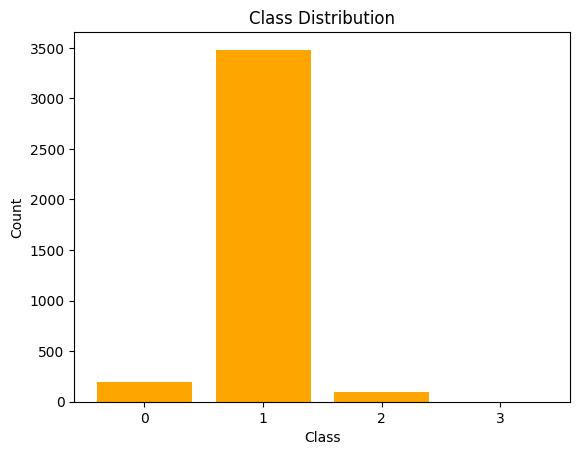

In [185]:
# Data Visualization - 1

# Bar Plot for Distribution of Class
counts = df["Class"].value_counts()
plt.bar(counts.index, counts.values, color ='orange')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(counts.index, counts.index.astype(str))
plt.show()

Cell 43 - Insights:
1. According to the Data Encoding results: 0: Compensated Hypothyroid; 1: Negative; 2: Primary Hypothyroid; 3: Secondary Hypothyroid.
2. According to the Bar Graph, it is evident, that the count of Negative is the Highest, followed by Compensated Hypothyroid, then Primary Hypothyroid and the least being Secondary Hypothyroid.

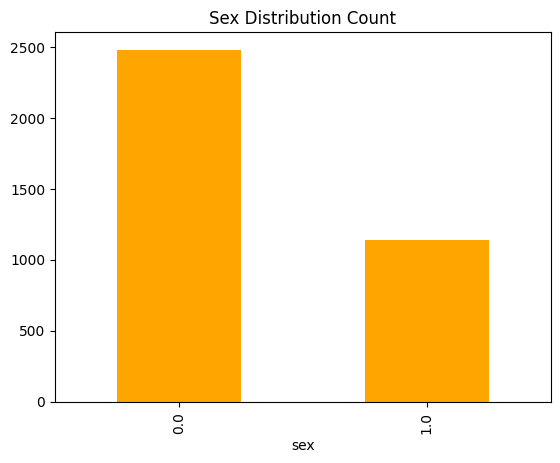

In [186]:
# Data Visualization - 2

# Bar Plot for Sex Distribution Count
df["sex"].value_counts().plot(kind = "bar", color='orange')
plt.title("Sex Distribution Count")
plt.show()

Cell 44 - Insights:
1. The Females have been assignes as 0 and Males have been assigned as 1, according to Data Encoding.
2. The Population of Females in the given Dataset is much more than their Male counterpart.

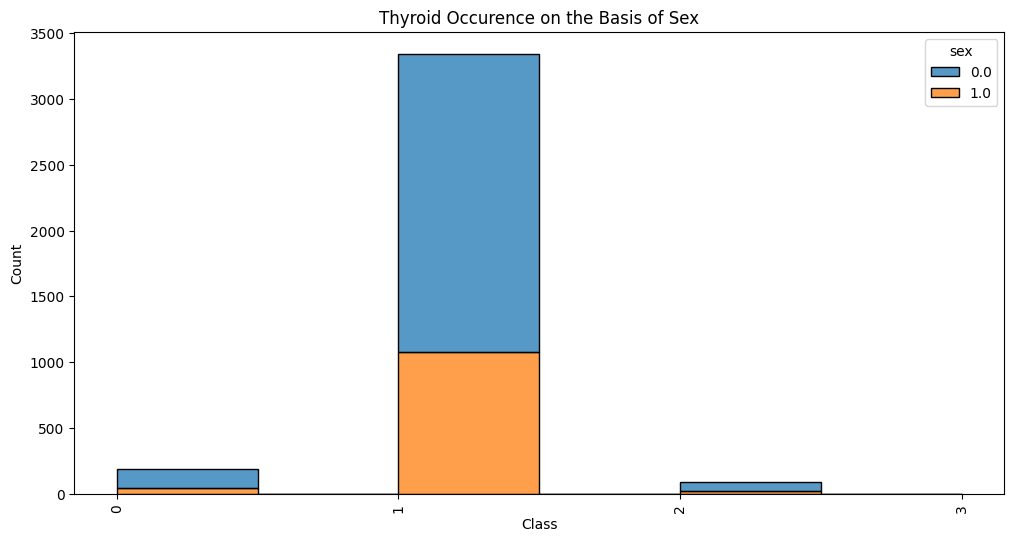

In [187]:
# Data Visualization - 3

# Histplot showing the Distribution of Thyroid on the Basis of Gender
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sex", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")
plt.title("Thyroid Occurence on the Basis of Sex")
plt.xticks(counts.index, counts.index.astype(str))
plt.show()

Cell 45 - Insights:
1. The intended graph has been generated successfully.
2. The count of both Males and Females are the most in case of Negative (encoded as 1), since this class has outnumbered other classes by a huge margin.

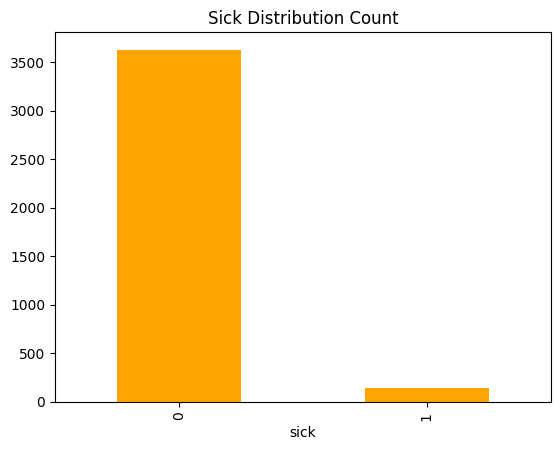

In [188]:
# Data Visualization - 4

# Bar Plot for Sick Distribution Count
df["sick"].value_counts().plot(kind = "bar", color='orange')
plt.title("Sick Distribution Count")
plt.show()

Cell 46 - Insights:
1. The intended graph has been generated successfully.
2. The count of non-sick is very much high in the given dataset.

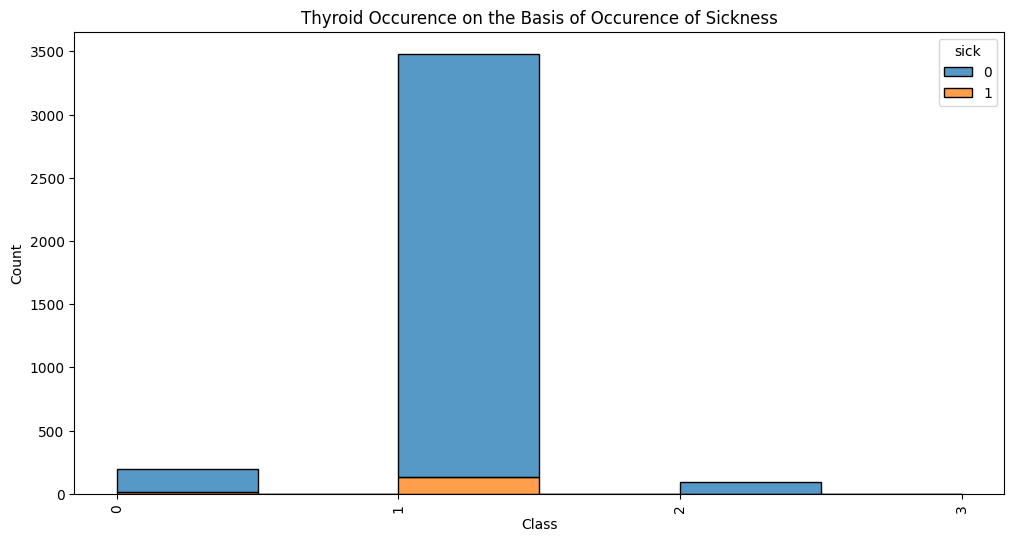

In [189]:
# Data Visualization - 5

# Histplot showing the Distribution of Thyroid on the Basis of Occurence of Sickness
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sick", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")
plt.title("Thyroid Occurence on the Basis of Occurence of Sickness")
plt.xticks(counts.index, counts.index.astype(str))
plt.show()

Cell 47 - Insights:
1. The intended graph has been generated successfully.
2. As it is evident from the graph, the population who are not sick forms a majority in the Negative Category.

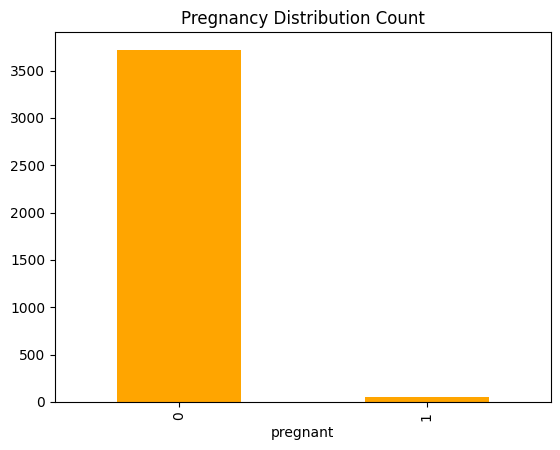

In [190]:
# Data Visualization - 6

# Bar Plot for Distribution Count of Pregnancy
df["pregnant"].value_counts().plot(kind = "bar", color='orange')
plt.title("Pregnancy Distribution Count")
plt.show()

Cell 48 - Insights:
1. The intended graph has been generated successfully.
2. The population of not pregnant forms a predominant majority.

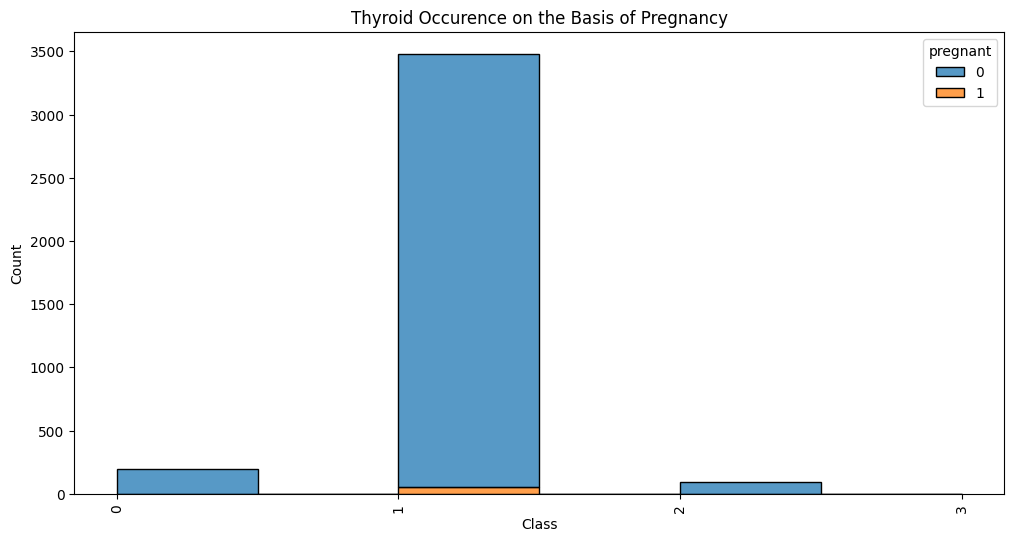

In [191]:
# Data Visualization - 7

# Histplot showing the Distribution of Thyroid on the Basis of Pregnancy
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="pregnant", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")
plt.title("Thyroid Occurence on the Basis of Pregnancy")
plt.xticks(counts.index, counts.index.astype(str))
plt.show()

Cell 49 - Insights:
1. The intended graph has been generated successfully.
2. The not pregnant category (encoded as 0) forms a majority, in every category of class.

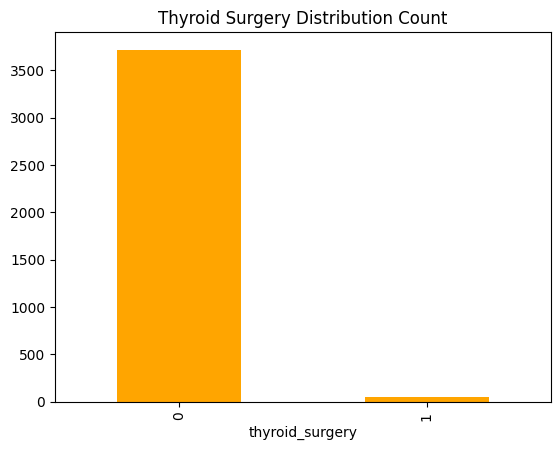

In [192]:
# Data Visualization - 8

# Bar Plot for Distribution Count of Pregnancy
df["thyroid_surgery"].value_counts().plot(kind = "bar", color='orange')
plt.title("Thyroid Surgery Distribution Count")
plt.show()

Cell 50 - Insights:
1. The intended graph has been generated successfully.
2. The ones without thyroid surgery forms majority in the given dataset.

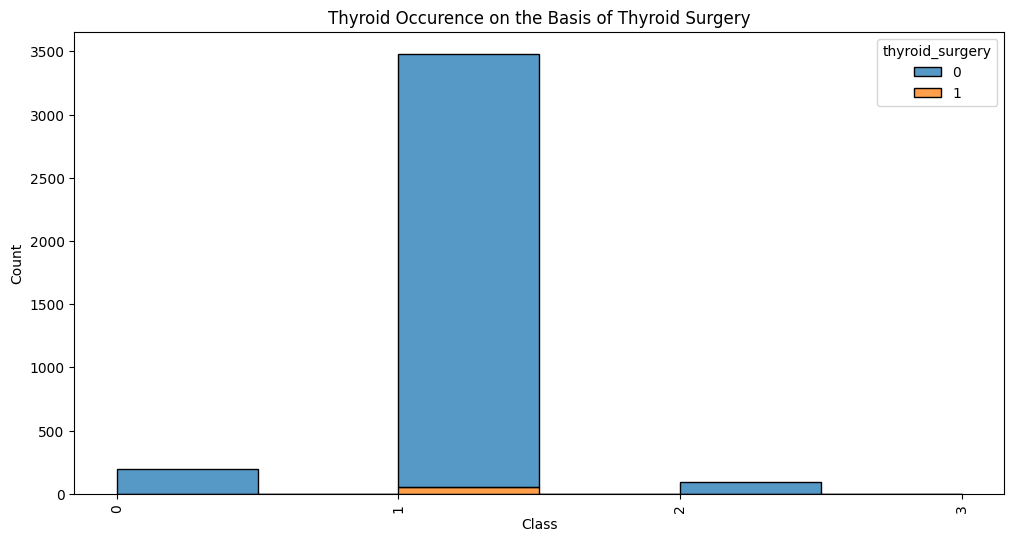

In [193]:
# Data Visualization - 9

# Histplot showing the Distribution of Thyroid on the Basis of Thyroid Surgery
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="thyroid_surgery", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")
plt.title("Thyroid Occurence on the Basis of Thyroid Surgery")
plt.xticks(counts.index, counts.index.astype(str))
plt.show()

Cell 51:
1. The intended graph has been generated successfully.
2. The ones without thyroid surgery forms majority.

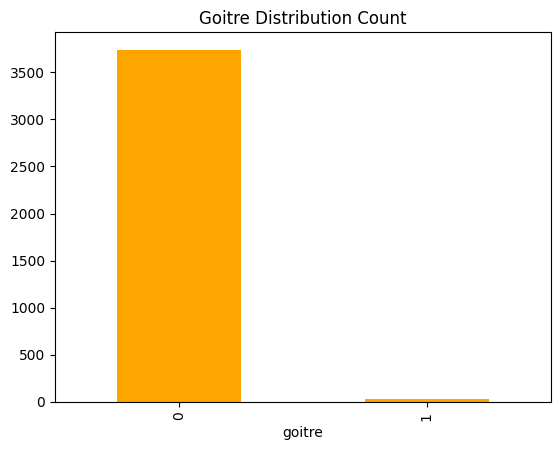

In [194]:
# Data Visualization - 10

# Bar Plot for Distribution Count of Goitre
df["goitre"].value_counts().plot(kind = "bar", color='orange')
plt.title("Goitre Distribution Count")
plt.show()

Cell 52 - Insights:
1. The intended graph has been generated successfully.
2. The ones without Goitre forms majority.

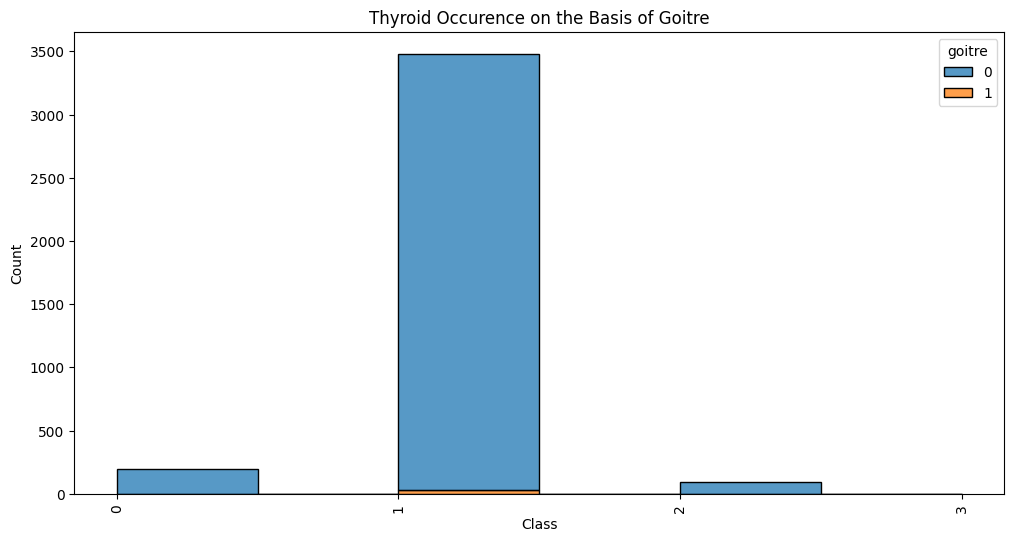

In [195]:
# Data Visualization - 11

# Histplot showing the Distribution of Thyroid on the Basis of Thyroid Surgery
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="goitre", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")
plt.title("Thyroid Occurence on the Basis of Goitre")
plt.xticks(counts.index, counts.index.astype(str))
plt.show()

Cell 53 - Insights:
1. The intended graph has been generated successfully.
2. The ones without Goitre forms majority.

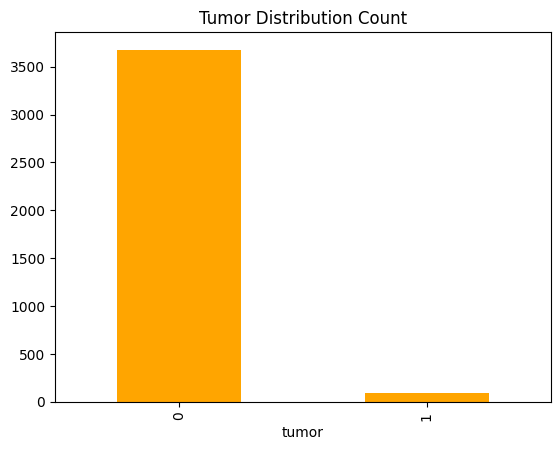

In [196]:
# Data Visualization - 12

# Bar Plot for Distribution Count of Tumor
df["tumor"].value_counts().plot(kind = "bar", color='orange')
plt.title("Tumor Distribution Count")
plt.show()

Cell 54 - Insights:
1. The intended graph has been generated successfully.
2. The ones without Tumor forms majority.

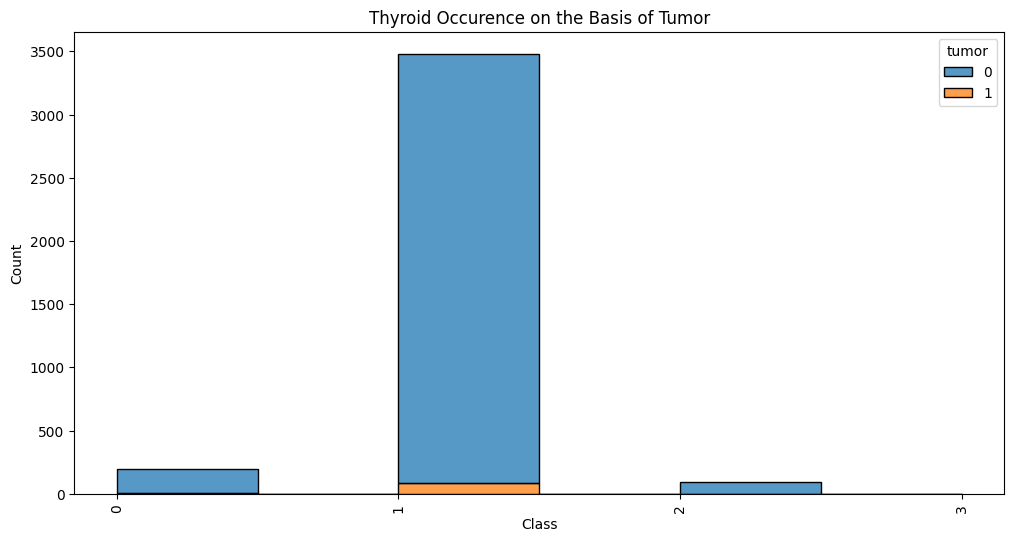

In [197]:
# Data Visualization - 13

# Histplot showing the Distribution of Thyroid on the Basis of Tumor
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="tumor", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")
plt.title("Thyroid Occurence on the Basis of Tumor")
plt.xticks(counts.index, counts.index.astype(str))
plt.show()

Cell 55 - Insights:
1. The intended graph has been generated successfully.
2. The ones without Tumor forms majority.

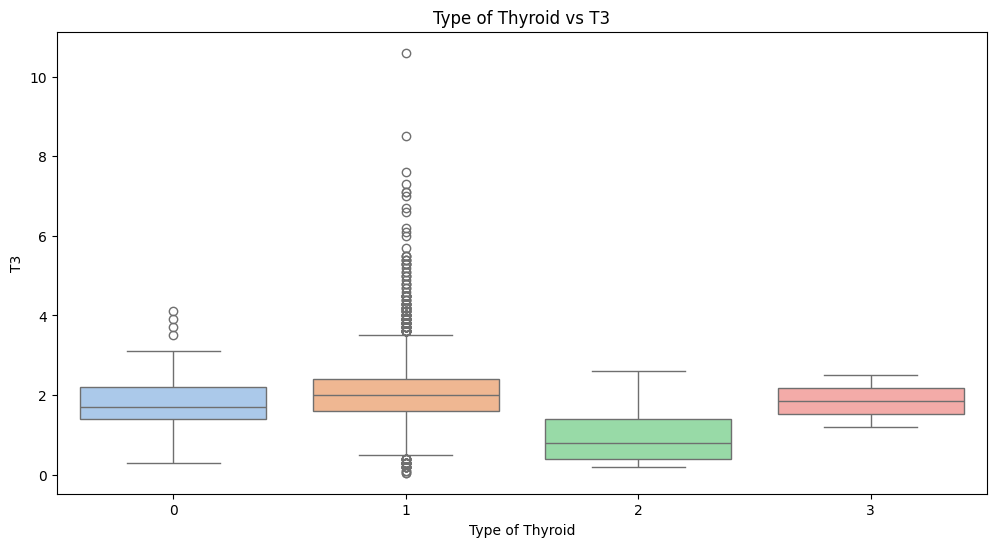

In [198]:
# Data Visualization - 14

# Box Plot (T3 vs Type of Thyroid)

# Data Transformation
df['T3'] = pd.to_numeric(df['T3'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "T3", data = df, palette="pastel")
plt.title("Type of Thyroid vs T3")
plt.xlabel("Type of Thyroid")
plt.ylabel("T3")
plt.show()

Cell 56 - Insights:
1. the intended graph has been generated successfully.
2. The presence of outliers are very much evident in case of Negative Category, followed by Compensated Hypothyroid Category.

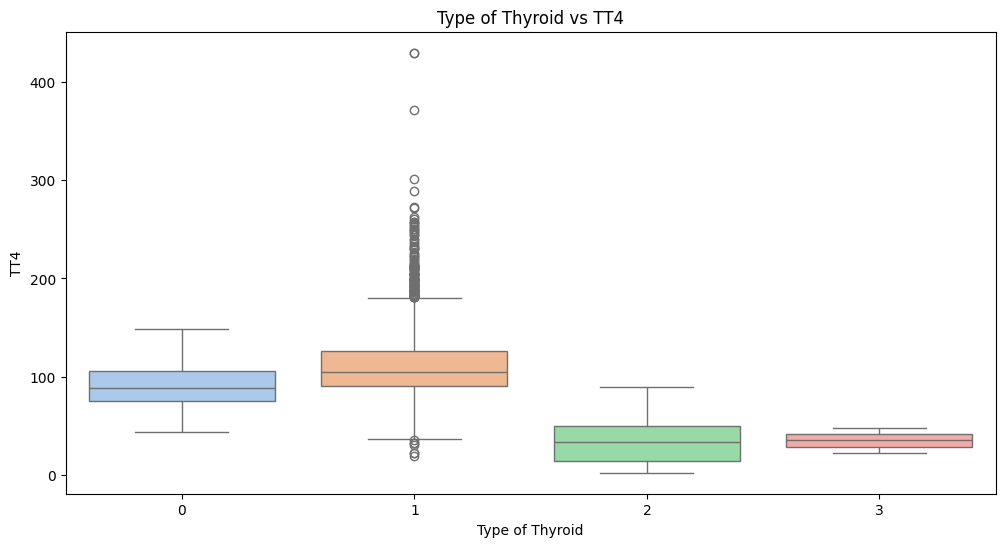

In [199]:
# Data Visualization - 15

# Box Plot (TT4 vs Type of Thyroid)

# Data Transformation
df['TT4'] = pd.to_numeric(df['TT4'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "TT4", data = df, palette="pastel")
plt.title("Type of Thyroid vs TT4")
plt.xlabel("Type of Thyroid")
plt.ylabel("TT4")
plt.show()

Cell 57 - Insights:
1. The intended graph has been generated successfully.
2. The presence of outliers are very much evident in case of Negative Category, followed by Compensated Hypothyroid Category.

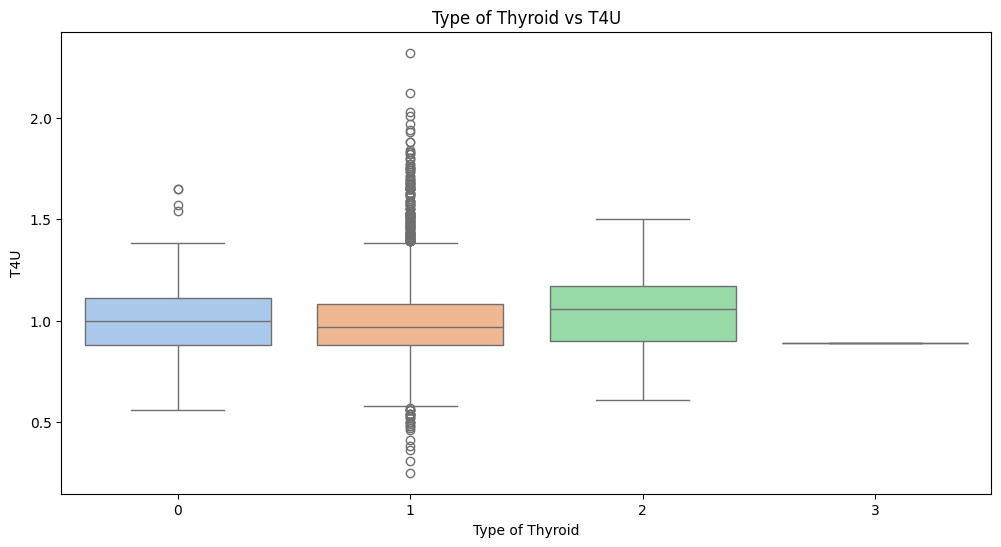

In [200]:
# Data Visualization - 16

# Box Plot (T4U vs Type of Thyroid)

# Data Transformation
df['T4U'] = pd.to_numeric(df['T4U'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "T4U", data = df, palette="pastel")
plt.title("Type of Thyroid vs T4U")
plt.xlabel("Type of Thyroid")
plt.ylabel("T4U")
plt.show()

Cell 58 - Insights:
1. The intended graph has been generated successfully.
2. The presence of outliers are very much evident in case of Negative Category, followed by Compensated Hypothyroid Category.

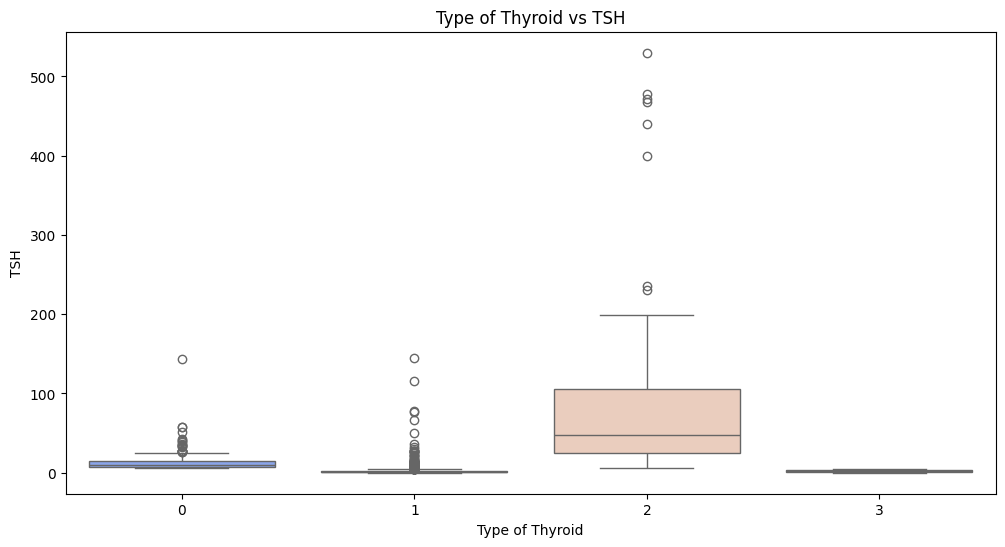

In [201]:
# Data Visualization - 17

# Box Plot (TSH vs Type of Thyroid)

# Data Transformation
df['TSH'] = pd.to_numeric(df['TSH'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "TSH", data = df, palette="coolwarm")
plt.title("Type of Thyroid vs TSH")
plt.xlabel("Type of Thyroid")
plt.ylabel("TSH")
plt.show()

Cell 59 - Insights:
1. The intended graph has been generated successfully.
2. The presence of outliers are very much evident in case of Negative Category, followed by Compensated Hypothyroid Category as well as Primary Hypothyroid, which also has the highest IQR.

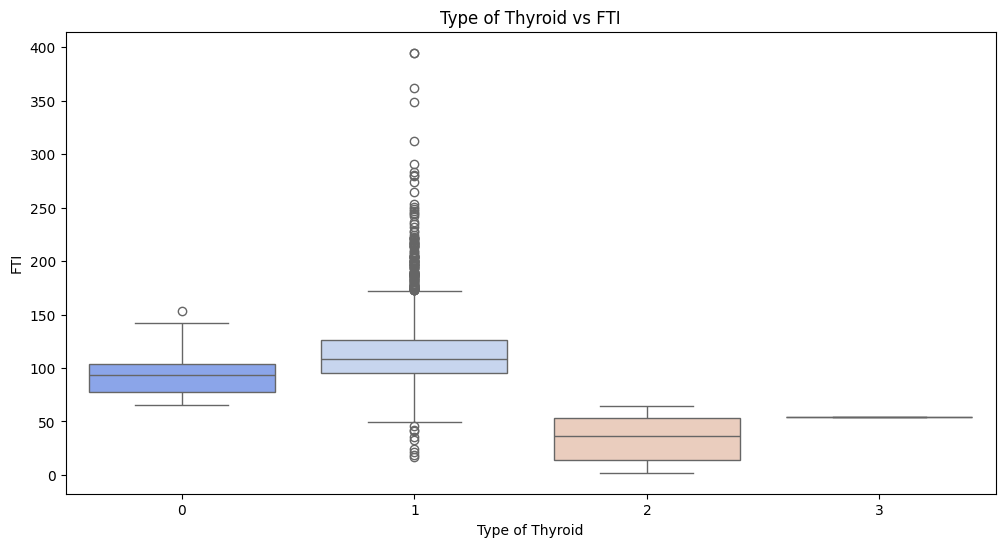

In [202]:
# Data Visualization - 18

# Box Plot (FTI vs Type of Thyroid)

# Data Transformation
df['FTI'] = pd.to_numeric(df['FTI'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "FTI", data = df, palette="coolwarm")
plt.title("Type of Thyroid vs FTI")
plt.xlabel("Type of Thyroid")
plt.ylabel("FTI")
plt.show()

Cell 60 - Insights:
1. The intended graph has been generated successfully.
2. The presence of outliers are very much evident in case of Negative Category, followed by Compensated Hypothyroid Category.

In [211]:
# Visualizing the DataFrame
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2.5,125.0,1.14,109.0,1,False,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,...,2.0,102.0,NaN,NaN,1,False,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109.0,0.91,120.0,1,False,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175.0,NaN,NaN,1,False,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61.0,0.87,70.0,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,1,False,False,False,False,True
3768,68,0.0,0,0,0,0,0,0,0,0,...,2.1,124.0,1.08,114.0,1,False,False,False,True,False
3769,74,0.0,0,0,0,0,0,0,0,0,...,1.8,112.0,1.07,105.0,1,False,False,False,False,True
3770,72,1.0,0,0,0,0,0,0,0,0,...,2.0,82.0,0.94,87.0,1,False,False,False,True,False


Cell 61 - Insights:
1. The DataFrame has been visualized successfully.
2. Presence of NaN can be observed.

In [213]:
# Check for Null Values
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
Class                          0
referral_source_STMW           0
referral_source_SVHC           0
referral_source_SVHD           0
referral_source_SVI            0
referral_source_other          0
dtype: int64

Cell 62 - Insights:
1. The Null Values are to be treated.

In [217]:
# Dropping the Null Values
df = df.drop(columns=['TSH','T3','TT4','T4U','FTI'], inplace=True)

Cell 63 - Insights:
1. The dropping has been successful.

# Data Balance

In [219]:
# Data Balance

"""
    It is evident from the above cell's outputs as well as the graphs generated, that the data is not balanced. 
    The class '0' has 1000 samples while the class '1' has only 100 samples, on an approximation.
    This implies that the data is imbalanced.
    This is a significant imbalance in the data, which can lead to biased models and poor performance on the minority class.
    The Data should be balanced.
"""
x = new_df.drop(['Class'],axis=1)
y = new_df['Class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

Cell 64 - Insights:
1. The Data Balancing has been done successfully.
2. It will be verified in the subsequent cell's outputs.
3. The Class column which has been the target, has been dropped from the newly made copy of the dataframe and has been assigned to the variable x.
4. The y variable has been assigned the target column which is the Class column from the original dataframe.

In [220]:
# Visualizing the Sampled Version of x
x_sampled.shape

(13924, 15)

Cell 65 - Insights:
1. The Shape of Sampled Version of x has been visualized.

In [222]:
# The top 10 records of x_sampled have been visualized
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled.head(10)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell 66 - Insights:
1. The top 10 records of x_sampled has also been observed.

In [223]:
# Checking for the Null Values
x_sampled.isnull().sum()

sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
dtype: int64

Cell 67 - Insights:
1. There are no Null Values in the Dataset.

In [224]:
# Print y_sampled
y_sampled

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
13919    3.0
13920    3.0
13921    3.0
13922    3.0
13923    3.0
Name: Class, Length: 13924, dtype: float64

Cell 68- Insights:
1. The y_sampled has been printed.
2. The Length and Data Type of the output has also been observed.

# Machine Learning

# Clustering of Data

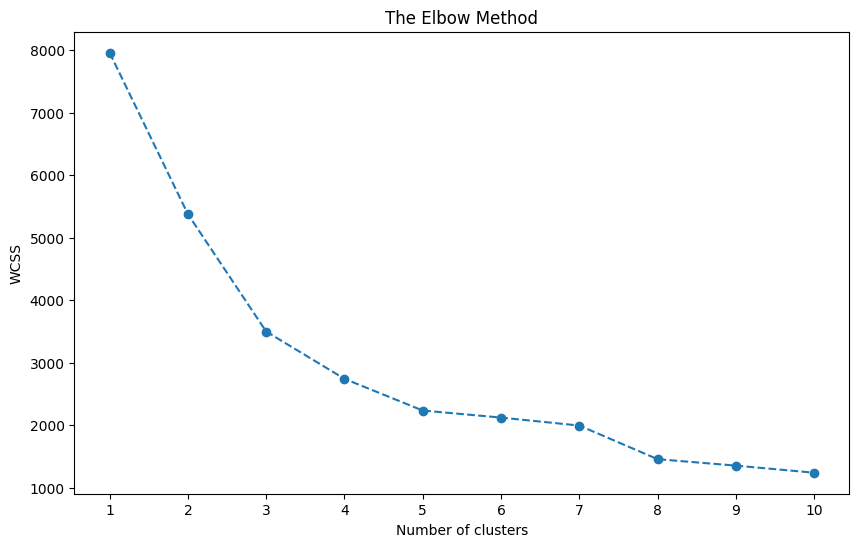

The optimum number of clusters is: 4


4

In [225]:
# Clustering of Data

def elbow_plot(data):
    
    """
    Method Name: elbow_plot
    Description: This method saves and displays the elbow plot to decide the optimum number of clusters.
    Output: The optimum number of clusters and displays the elbow plot.
    On Failure: Raise Exception
    """
    
    wcss = []
    
    try:
        if data.empty:
            raise ValueError("Input data is empty.")
        
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
            kmeans.fit(data)
            wcss.append(kmeans.inertia_)
        
        # Plot the Graph
        # Data Visualization - 19
        
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
        plt.title('The Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.xticks(range(1, 11))
        
        # Saving the elbow plot locally
        plt.savefig('K-Means_Elbow.PNG')
        
        # Displaying the plot
        plt.show()
        
        # Closing the plot
        plt.close()
        
        # Finding the value of the optimum cluster programmatically
        kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
        print('The optimum number of clusters is:', kn.knee)
        return kn.knee
    
    except Exception as e:
        print(f"An error occurred in elbow_plot method: {e}")
        raise e

# Call the function
elbow_plot(x_sampled)

Cell 69 - Insights:
1. Introduction:- The provided code is a Python function named 'elbow_plot' that is used to determine the optimal number of clusters for a K-Means clustering algorithm.
2. Purpose:- The function is designed to create an elbow plot, which is a graphical representation of the Within Cluster Sum of Squares (WCSS) against the number of clusters. The plot helps to identify the optimal number of clusters for a dataset.
3. Input:- The function takes a single input 'data', which is expected to be a 2D array or a Pandas DataFrame.
4. WCSS Calculation:- The function calculates the WCSS for each number of clusters from 1 to 10. It uses the 'KMeans' class from the 'sklearn.cluster' module to perform the clustering and calculate the WCSS.
5. Plotting:- The function creates a line plot of the WCSS against the number of clusters using the 'matplotlib' library. The plot is saved to a file named 'K-Means_Elbow.PNG'.
6. Optimal Cluster Detection:- The function uses the 'KneeLocator' class from the 'kneed' library to programmatically detect the optimal number of clusters. The 'KneeLocator' class identifies the point of maximum curvature in the WCSS plot, which corresponds to the optimal number of clusters.
7. Error Handling:- The function includes a try-except block to catch any exceptions that may occur during execution. If an exception occurs, the function prints the error message.
8. Return Value:- The function returns the optimal number of clusters detected by the 'KneeLocator' class.
9. Output:- The Graph (Elbow Plot) has been generated successfully and it can be observed that the Optimum Number of Clusters is 4.

In [228]:
# Creating Clusters

def create_clusters(data,number_of_clusters):

        """
            Method Name: create_clusters
            Description: Create a new dataframe consisting of the cluster information.
            Output: A datframe with cluster column
            On Failure: Raise Exception
      """
        
        try:
            kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
            
            # Divide data into clusters
            y_kmeans=kmeans.fit_predict(data) 

            # Create a new column in dataset for storing the cluster information
            data['Cluster']=y_kmeans  
            print('succesfully created '+str(f"{number_of_clusters}")+ ' clusters.\nExited the create_clusters method of the KMeansClustering class')
            return data

        except Exception as e:
          print(e)
        
x_sampled = create_clusters(x_sampled,4)

succesfully created 4 clusters.
Exited the create_clusters method of the KMeansClustering class


Cell 70 - Insights:
1. The Optimum Number of Clusters have been created successfully.

In [229]:
# Visualizing the Sampled Version of x
x_sampled

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,Cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
13920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Cell 71 - Insights:
1. The code of Cell 71 has been executed successfully.

In [230]:
#Adding data labels into x
x_sampled['Labels']=y_sampled

Cell 72 - Insights:
1. The cell's code has been executed successfully.

In [231]:
# Printing top 10 records of the Sampled Version of x
x_sampled.head(10)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,Cluster,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0


Cell 73 - Insights:
1. The cell's code has run successfully.

In [232]:
# Print the List of Clusters
list_of_clusters=x_sampled['Cluster'].unique()
list_of_clusters

array([0, 1, 2, 3])

Cell 74 - Insights:
1. The code has run successfully.

# Models on Cluster

In [233]:
# Print the Cluster Data
cluster_data=x_sampled[x_sampled['Cluster']==1]
cluster_data

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,Cluster,Labels
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
16,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0
10436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0
10437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0
10439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0


Cell 75 - Insights:
1. The Cluster Data has been printed successfully.

In [237]:
# Data Modification
cluster_features=cluster_data.drop(['Labels','Cluster'],axis=1)
cluster_label= cluster_data['Labels']

Cell 76 - Insights:
1. The Data Modification has been done successfully.

In [238]:
# Print the Cluster Features
cluster_features

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell 77 - Insights:
1. The Cluster Features have been printed successfully.

In [239]:
# Print Cluster Labels
cluster_label

2        1.0
9        1.0
14       1.0
15       0.0
16       1.0
        ... 
10434    2.0
10436    2.0
10437    2.0
10439    2.0
10444    2.0
Name: Labels, Length: 3294, dtype: float64

Cell 78 - Insights:
1. The Cluster Label has been printed successfully.

In [240]:
# Splitting the data into Training and Test Dataset
x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=0.25, random_state=42)

Cell 79 - Insights:
1. The Dataset has been successfully splitted into Training Dataset and Test Dataset.
2. The Train - Test Split is a must before starting any Machine Learning operations.
3. The Training Dataset, is the one upon which our model will be trained.
4. The Test Dataset, is the one upon which our model will be tested.
5. Both the Features and Target Variables have been divided into Train - Test.
6. The Training Dataset has 75% of the total data and the Test Dataset has 20% of the total data.
7. A Random State has also been assigned, (in this case, it is 42, although any number can be used), in order to maintain the reproducibility of the result.

In [242]:
# Printing the Training Dataset of X
x_train

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
780,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3372,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7930,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5598,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell 80 - Insights:
1. The Training Dataset for x has been printed successfully.

In [243]:
# Printing the Test Dataset of x
x_test

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
9741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9954,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9743,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9261,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1846,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell 81 - Insights:
1. The Test Dataset of x has been printed successfully.

In [244]:
# Printing the Training Dataset of y
y_train

780     1.0
6909    0.0
3372    1.0
7930    2.0
5598    0.0
       ... 
3006    1.0
3116    1.0
3535    2.0
2378    0.0
9988    2.0
Name: Labels, Length: 2470, dtype: float64

Cell 82 - Insights:
1. y_train has been printed successfully.

In [245]:
# Printing the Test Dataset of y
y_test

9741    2.0
9954    2.0
9743    2.0
5715    0.0
7226    2.0
       ... 
9261    2.0
1846    1.0
602     1.0
1023    0.0
4886    0.0
Name: Labels, Length: 824, dtype: float64

Cell 83 - Insights:
1. y_test has been printed successfully.

In [247]:
# Model: Random Forest

def get_best_params_for_random_forest(train_x,train_y):
    
        """
            Method Name: get_best_params_for_random_forest
            Description: get the parameters for Random Forest Algorithm which give the best accuracy.
            Use Hyper Parameter Tuning.
            Output: The model with the best parameters
            On Failure: Raise Exception
        """
        
        print('Entered the get_best_params_for_random_forest method of the Model_Finder class')
        
        try:
            
            # initializing with different combination of parameters
            param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                        "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']}

            clf = RandomForestClassifier()
        
            #Creating an object of the Grid Search class
            grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
            
            #finding the best parameters
            grid.fit(train_x, train_y)

            #extracting the best parameters
            criterion = grid.best_params_['criterion']
            max_depth = grid.best_params_['max_depth']
            max_features = grid.best_params_['max_features']
            n_estimators = grid.best_params_['n_estimators']

            #creating a new model with the best parameters
            clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_features=max_features)
            
            # training the mew model
            clf.fit(train_x, train_y)
            
            print('Random Forest best params: '+str(f"{grid.best_params_}"))
            print('\nExited the get_best_params_for_random_forest method of the Model_Finder class')

            return clf
        
        except Exception as e:
            raise Exception()

# Get the Best Parameters for Random Forest
random_forest_classifier = get_best_params_for_random_forest(x_train,y_train)

Entered the get_best_params_for_random_forest method of the Model_Finder class
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   

Cell 84 - Insights:
1. Introduction:- The code provided is a method to find the best parameters for a Random Forest Classifier model using GridSearchCV, a hyperparameter tuning technique.
2. Best Parameters:- The code gives the best parameters for Random Forest Classifier Model as output. The parameters tuned in this code includes - 'n_estimators', 'criterion', 'max_depth' and 'max_features'.
3. GridSearchCV:- The code uses GridSearchCV to perform hyperparameter tuning.
4. Cross-Validation:- The code uses 5-fold cross-validation (cv=5) to evaluate the model's performance. This means that the data is split into 5 folds, and the model is trained and evaluated on each fold.
5. Verbose:- The code sets verbose=3, which means that GridSearchCV will print detailed information about the search process, including the parameters being tried and the resulting scores.
6. Model Training:- After finding the best parameters, the code trains a new Random Forest Classifier model with these parameters and fits it to the training data.
7. Output:- The code gives the best parameters found by GridSearchCV as output, which can be used to train a new model or to evaluate the performance of the model.
8. Sample Output:- Random Forest best params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}

In [248]:
# Model: Decision Tree

def get_best_params_for_decision_tree(train_x, train_y):
    
    """
        Method Name: get_best_params_for_decision_tree
        Description: get the parameters for Decision Tree Algorithm which give the best accuracy.
        Use Hyper Parameter Tuning.
        Output: The model with the best parameters
        On Failure: Raise Exception
    """
    
    print('Entered the get_best_params_for_decision_tree method of the Model_Finder class')
    
    try:
        
        # initializing with different combination of parameters
        param_grid = {"criterion": ['gini', 'entropy'], "max_depth": range(2, 4, 1), 
                    "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 5, 10]}
        
        clf = DecisionTreeClassifier()
        
        #Creating an object of the Grid Search class
        grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
        
        #finding the best parameters
        grid.fit(train_x, train_y)

        #extracting the best parameters
        criterion = grid.best_params_['criterion']
        max_depth = grid.best_params_['max_depth']
        min_samples_split = grid.best_params_['min_samples_split']
        min_samples_leaf = grid.best_params_['min_samples_leaf']

        #creating a new model with the best parameters
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        
        # training the new model
        clf.fit(train_x, train_y)
        
        print('Decision Tree best params: '+str(f"{grid.best_params_}"))
        print('\nExited the get_best_params_for_decision_tree method of the Model_Finder class')

        return clf
    
    except Exception as e:
        raise Exception()

# Get the Best Parameters for Decision Tree
decision_tree_classifier = get_best_params_for_decision_tree(x_train, y_train)

Entered the get_best_params_for_decision_tree method of the Model_Finder class
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.455 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.490 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.443 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.474 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.480 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.455 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.490 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_

Cell 85 - Insights:
1. The code is designed to find the best parameters for a Decision Tree Classifier using hyperparameter tuning with GridSearchCV.
2. The 'get_best_params_for_decision_tree' function takes in training data 'train_x' and 'train_y' as input.
3. It defines a parameter grid 'param_grid' with different combinations of hyperparameters for the Decision Tree Classifier, including - 'criterion', 'max_depth', 'min_samples_split' and 'min_samples_leaf'.
4. It creates a GridSearchCV object 'grid' with the Decision Tree Classifier 'clf' as the estimator, the parameter grid 'param_grid' and 5-fold cross-validation ('cv=5').
5. The 'grid' object is fitted to the training data using 'grid.fit(train_x, train_y)'.
6. A new Decision Tree Classifier 'clf' is created with the best parameters and trained on the training data using 'clf.fit(train_x, train_y)'.
7. The best parameters and the trained model are returned.
8. In this code, the output is: Decision Tree best params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [249]:
# Model: Logistic Regression

def get_best_params_for_logistic_regression(train_x, train_y):
    
    """
        Method Name: get_best_params_for_logistic_regression
        Description: get the parameters for Logistic Regression Algorithm which give the best accuracy.
        Use Hyper Parameter Tuning.
        Output: The model with the best parameters
        On Failure: Raise Exception
    """
    
    print('Entered the get_best_params_for_logistic_regression method of the Model_Finder class')
    
    try:
        
        # initializing with different combination of parameters
        param_grid = {"penalty": ['l1', 'l2'], "C": [0.1, 1, 10], "max_iter": [500, 1000, 2000]}
        
        clf = LogisticRegression()
        
        #Creating an object of the Grid Search class
        grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
        
        #finding the best parameters
        grid.fit(train_x, train_y)

        #extracting the best parameters
        penalty = grid.best_params_['penalty']
        C = grid.best_params_['C']
        max_iter = grid.best_params_['max_iter']

        #creating a new model with the best parameters
        clf = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter)
        
        # training the new model
        clf.fit(train_x, train_y)
        
        print('Logistic Regression best params: '+str(f"{grid.best_params_}"))
        print('\nExited the get_best_params_for_logistic_regression method of the Model_Finder class')

        return clf
    
    except Exception as e:
        raise Exception()

# Get the Best Parameters for Logistic Regression
logistic_regression_classifier = get_best_params_for_logistic_regression(x_train, y_train)

Entered the get_best_params_for_logistic_regression method of the Model_Finder class
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .....C=0.1, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.1, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.1, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.1, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.1, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.1, max_iter=500, penalty=l2;, score=0.460 total time=   0.0s
[CV 2/5] END ...C=0.1, max_iter=500, penalty=l2;, score=0.490 total time=   0.0s
[CV 3/5] END ...C=0.1, max_iter=500, penalty=l2;, score=0.447 total time=   0.0s
[CV 4/5] END ...C=0.1, max_iter=500, penalty=l2;, score=0.478 total time=   0.0s
[CV 5/5] END ...C=0.1, max_iter=500, penalty=l2;, score=0.474 total time=   0.0s
[CV 1/5] END ....C=0.1, max_iter=1000, penal

Cell 86 - Insights:
1. Introduction:- The provided code is a well-structured implementation of a function to find the best parameters for a Logistic Regression model using Grid Search.
2. Functionality:- The function 'get_best_params_for_logistic_regression' takes in training data 'train_x' and 'train_y' and returns a trained Logistic Regression model with the best parameters found using Grid Search.
3. Hyperparameter Tuning:- The function uses Grid Search to tune the hyperparameters of the Logistic Regression model. The hyperparameters being tuned are - 'penalty', 'c' and 'max_iter'.
4. GridSearch:- The function uses 'GridSearchCV' from scikit-learn to perform the grid search. This is a good choice because it allows for cross-validation, which helps prevent overfitting.
5. Cross-Validation:- The function uses 5-fold cross-validation '(cv=5)', which is a good choice for many datasets. However, the choice of the number of folds depends on the size of the dataset and the computational resources available.
6. Verbose:- The function sets 'verbose=3', which means that the grid search will print out the progress at each iteration. This can be helpful for monitoring the progress, but it can also be overwhelming if the grid search is performed over a large number of hyperparameters.
7. Error Handling:- The function catches any exceptions that may occur during the execution and raises a new exception. This is good practice, but it would be more informative to include the original exception message in the new exception.
8. Code Organization:- The function is well-organized and easy to follow. The comments are informative and provide a good understanding of what the function does.
9. Printing:- The function prints out the best parameters found by the grid search. This is helpful for understanding the results, but it may not be desirable in all situations (e.g., if the function is being used in a larger pipeline).
10. Sample Output:- Logistic Regression best params: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}

In [253]:
# Model: LinearRegression

def get_best_params_for_linear_regression(train_x, train_y):
    
    """
        Method Name: get_best_params_for_linear_regression
        Description: get the parameters for Linear Regression Algorithm which give the best accuracy.
        Use Hyper Parameter Tuning.
        Output: The model with the best parameters
        On Failure: Raise Exception
    """
    
    print('Entered the get_best_params_for_linear_regression method of the Model_Finder class')
    
    try:
        # Check if the input data is valid
        if train_x is None or train_y is None:
            raise ValueError("Input data is empty")
        
        # initializing with different combination of parameters
        param_grid = {"fit_intercept": [True, False]}
        
        clf = LinearRegression()
        
        #Creating an object of the Grid Search class
        grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
        
        #finding the best parameters
        grid.fit(train_x, train_y)

        #extracting the best parameters
        fit_intercept = grid.best_params_['fit_intercept']

        #creating a new model with the best parameters
        clf = LinearRegression(fit_intercept=fit_intercept)
        
        # training the new model
        clf.fit(train_x, train_y)
        
        print('Linear Regression best params: '+str(f"{grid.best_params_}"))
        print('\nExited the get_best_params_for_linear_regression method of the Model_Finder class')

        return clf
    
    except Exception as e:
        print(f"An error occurred: {e}")
        raise Exception()

# Get the Best Parameters for Linear Regression
linear_regression_classifier = get_best_params_for_linear_regression(x_train, y_train)

Entered the get_best_params_for_linear_regression method of the Model_Finder class
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ................fit_intercept=True;, score=0.035 total time=   0.2s
[CV 2/5] END ................fit_intercept=True;, score=0.090 total time=   0.0s
[CV 3/5] END ................fit_intercept=True;, score=0.068 total time=   0.0s
[CV 4/5] END ................fit_intercept=True;, score=0.050 total time=   0.0s
[CV 5/5] END ................fit_intercept=True;, score=0.079 total time=   0.0s
[CV 1/5] END ...............fit_intercept=False;, score=0.024 total time=   0.0s
[CV 2/5] END ...............fit_intercept=False;, score=0.082 total time=   0.0s
[CV 3/5] END ...............fit_intercept=False;, score=0.053 total time=   0.0s
[CV 4/5] END ...............fit_intercept=False;, score=0.042 total time=   0.0s
[CV 5/5] END ...............fit_intercept=False;, score=0.066 total time=   0.0s
Linear Regression best params: {'fit_intercept'

Cell 87 - Insights:
1. Purpose:- The provided code is a Python function named 'get_best_params_for_linear_regression' that uses the 'GridSearchCV' class from the sklearn.model_selection module to perform hyperparameter tuning for a Linear Regression model.
2. Function Signature:- The function takes two parameters, 'train_x' and 'train_y', which are the training data and target variable, respectively.
3. Input Validation:- The function checks if the input data is valid by checking if 'train_x' and 'train_y' are not 'None'. If either of them is 'None', it raises a 'ValueError' with the message "Input data is empty".
4. Hyperparameter Tuning:- The function uses the 'GridSearchCV' class to perform hyperparameter tuning. It defines a parameter grid 'param_grid' with a single hyperparameter 'fit_intercept' that can take values 'True' or 'False'. This means that the function will try two different models: one with an intercept term and one without.
5. Model Training:- The function trains a Linear Regression model using the 'GridSearchCV' object. The fit method is called on the 'grid' object, passing in the training data 'train_x' and 'train_y'.
6. Best Parameters Extraction:- After training the model, the function extracts the best parameters from the 'grid' object using the 'best_params_' attribute. In this case, the best parameter is the value of 'fit_intercept' that resulted in the best performance.
7. New Model Creation:- The function creates a new Linear Regression model with the best parameters and trains it on the training data.
8. Return Value:- The function returns the trained Linear Regression model with the best parameters.
9. Error Handling:- The function catches any exceptions that may occur during execution and prints an error message. It then re-raises the exception.
10. Usage:- The function is called with the training data 'x_train' and 'y_train' as arguments, and the resulting model is stored in the variable 'linear_regression_classifier'.
11. Code Organization:- Overall, this code is a good example of how to perform hyperparameter tuning for a Linear Regression model using the 'GridSearchCV' class from scikit-learn. However, it's worth noting that the 'fit_intercept' parameter is not typically considered a hyperparameter that needs to be tuned, as it is usually set to 'True' by default.
12. Sample Output:- Linear Regression best params: {'fit_intercept': True}

In [254]:
# Model: Adaboost

def get_best_params_for_adaboost(train_x, train_y):
    
    """
        Method Name: get_best_params_for_adaboost
        Description: get the parameters for Adaboost Algorithm which give the best accuracy.
        Use Hyper Parameter Tuning.
        Output: The model with the best parameters
        On Failure: Raise Exception
    """
    
    print('Entered the get_best_params_for_adaboost method of the Model_Finder class')
    
    try:
        # initializing with different combination of parameters
        param_grid = {"n_estimators": [10, 50, 100, 130], "learning_rate": [0.1, 0.5, 1, 2]}

        clf = AdaBoostClassifier()
        
        #Creating an object of the Grid Search class
        grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
        
        #finding the best parameters
        grid.fit(train_x, train_y)

        #extracting the best parameters
        n_estimators = grid.best_params_['n_estimators']
        learning_rate = grid.best_params_['learning_rate']

        #creating a new model with the best parameters
        clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
        
        # training the new model
        clf.fit(train_x, train_y)
        
        print('Adaboost best params: '+str(f"{grid.best_params_}"))
        print('\nExited the get_best_params_for_adaboost method of the Model_Finder class')

        return clf
    
    except Exception as e:
        raise Exception()

# Get the Best Parameters for Adaboost
adaboost_classifier = get_best_params_for_adaboost(x_train, y_train)

Entered the get_best_params_for_adaboost method of the Model_Finder class
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.1, n_estimators=10;, score=0.457 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=10;, score=0.484 total time=   0.0s
[CV 3/5] END learning_rate=0.1, n_estimators=10;, score=0.431 total time=   0.0s
[CV 4/5] END learning_rate=0.1, n_estimators=10;, score=0.474 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=10;, score=0.478 total time=   0.0s
[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.462 total time=   0.1s
[CV 2/5] END learning_rate=0.1, n_estimators=50;, score=0.484 total time=   0.0s
[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.435 total time=   0.1s
[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.474 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=50;, score=0.478 total time=   0.1s
[CV 1/5] END learning_rate=0.1, n_estimators=100;, scor

Cell 88 - Insights:
1. Purpose:- This code is designed to find the best parameters for an AdaBoost classifier using hyperparameter tuning.
2. Defining the Function:- The function 'get_best_params_for_adaboost' is defined to find the best parameters for the AdaBoost classifier. It takes two parameters, 'train_x' and 'train_y', which are the training data and target variable respectively.
3. Defining the Parameter Grid:- A parameter grid is defined with different combinations of parameters for the AdaBoost classifier. In this case, the grid includes different values for 'n_estimators' (10, 50, 100, 130) and 'learning_rate' (0.1, 0.5, 1, 2).
4. Initializing the Classifier and Grid Search:- An instance of the 'AdaBoostClassifier' is created, and a 'GridSearchCV' object is created with the classifier, parameter grid, and cross-validation folds '(cv=5)'.
5. Finding the Best Parameters:- The 'fit' method of the 'GridSearchCV' object is called with the training data and target variable. This performs a grid search over the parameter grid and finds the best combination of parameters that results in the highest accuracy.
6. Extracting the Best Parameters:- The best parameters are extracted from the 'GridSearchCV' object and used to create a new 'AdaBoostClassifier' with the best parameters.
7. Training the New Model:- The new 'AdaBoostClassifier' is trained on the training data and target variable.
8. Returning the Model:- The trained 'AdaBoostClassifier' with the best parameters is returned.
9. Calling the Function:- The function is called with the training data and target variable, and the resulting model is stored in the 'adaboost_classifier' variable.
10. Sample Output:- Adaboost best params: {'learning_rate': 1, 'n_estimators': 10}

In [255]:
# Model: Gradient Boosting

def get_best_params_for_gradient_boosting(train_x, train_y):
    
    """
        Method Name: get_best_params_for_gradient_boosting
        Description: get the parameters for Gradient Boosting Algorithm which give the best accuracy.
        Use Hyper Parameter Tuning.
        Output: The model with the best parameters
        On Failure: Raise Exception
    """
    
    print('Entered the get_best_params_for_gradient_boosting method of the Model_Finder class')
    
    try:
        # initializing with different combination of parameters
        param_grid = {
            "learning_rate": [0.1, 0.5, 1, 2],
            "n_estimators": [10, 50, 100, 130],
            "max_depth": [3, 5, 7, 9],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 5, 10]
        }

        clf = GradientBoostingClassifier()
        
        #Creating an object of the Grid Search class
        grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
        
        #finding the best parameters
        grid.fit(train_x, train_y)

        #extracting the best parameters
        learning_rate = grid.best_params_['learning_rate']
        n_estimators = grid.best_params_['n_estimators']
        max_depth = grid.best_params_['max_depth']
        min_samples_split = grid.best_params_['min_samples_split']
        min_samples_leaf = grid.best_params_['min_samples_leaf']

        #creating a new model with the best parameters
        clf = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, 
                                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        
        # training the new model
        clf.fit(train_x, train_y)
        
        print('Gradient Boosting best params: '+str(f"{grid.best_params_}"))
        print('\nExited the get_best_params_for_gradient_boosting method of the Model_Finder class')

        return clf
    
    except Exception as e:
        raise Exception()

# Get the Best Parameters for Gradient Boosting
gradient_boosting_classifier = get_best_params_for_gradient_boosting(x_train, y_train)

Entered the get_best_params_for_gradient_boosting method of the Model_Finder class
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.457 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.490 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.449 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.480 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.478 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.457 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3

Cell 89 - Insights:
1. Purpose:- The code is designed to find the best hyperparameters for a Gradient Boosting Classifier model using Grid Search with Cross-Validation.
2. Method:- The 'get_best_params_for_gradient_boosting' method takes in training data 'train_x' and 'train_y' as input and returns a trained Gradient Boosting Classifier model with the best hyperparameters.
3. Hyperparameter Tuning:- The method uses Grid Search with Cross-Validation to tune the following hyperparameters - ' learning_rate', 'n_estimators', 'max_depth', 'min_samples_split' and 'min_samples_leaf'.
4. Grid Search:- The 'GridSearchCV' class from scikit-learn is used to perform the grid search. It takes in the 'clf' object (Gradient Boosting Classifier), 'param_grid' (a dictionary of hyperparameters to tune), and 'cv=5' (number of folds for cross-validation).
5. Best Parameters:- The method extracts the best hyperparameters from the grid search results and uses them to train a new Gradient Boosting Classifier model.
6. Return:- The method returns the trained model with the best hyperparameters.
7. Error Handling:- The method catches any exceptions that may occur during the execution and raises a new exception.
8. Sample Output:- Gradient Boosting best params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}

In [260]:
# Model: XGBoost

def get_best_params_for_xgboost(train_x,train_y):
    
    """
        Method Name: get_best_params_for_xgboost
        Description: get the parameters for XGBoost Algorithm which give the best accuracy.
        Use Hyper Parameter Tuning.
        Output: The model with the best parameters
        On Failure: Raise Exception
    """
    
    print('Entered the get_best_params_for_xgboost method of the Model_Finder class')
    
    try:
        
        # initializing with different combination of parameters
        param_grid_xgboost = {
                                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                                'max_depth': [3, 5, 10, 20],
                                'n_estimators': [10, 50, 100, 200]
                            }
        
        # Creating an object of the Grid Search class
        grid = GridSearchCV(XGBClassifier(objective='binary:logistic'), param_grid_xgboost, verbose=3, cv=5)
        
        # Finding the best parameters
        grid.fit(train_x, train_y)
        
        # Extracting the best parameters
        learning_rate = grid.best_params_['learning_rate']
        max_depth = grid.best_params_['max_depth']
        n_estimators = grid.best_params_['n_estimators']
        
        # Creating a new model with the best parameters
        xgb = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
        
        # Training the mew model
        xgb.fit(train_x, train_y)
        print('XGBoost best params: ' + str(f"{grid.best_params_}") + '. Exited the get_best_params_for_xgboost method of the Model_Finder class')

        return xgb
    
    except Exception as e:
        raise Exception()
    
# Get the Best Parameters for XGBoost
xgb_classifier = get_best_params_for_xgboost(x_train,y_train)

Entered the get_best_params_for_xgboost method of the Model_Finder class
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.457 total time=   1.3s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.490 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.449 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.480 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.478 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.451 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.494 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.453 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.478 total time=   0.0s
[CV 5/5] END learni

Cell 90 - Insights:
1. Purpose:- The code is designed to find the best hyperparameters for an XGBoost classifier using GridSearchCV, a hyperparameter tuning method.
2. Functionality:- The 'get_best_params_for_xgboost' function takes in training data 'train_x' and 'train_y' as input.
3. Hyperparameters:- It defines a parameter 'grid param_grid_xgboost' with three hyperparameters - 'learning_rate', 'max_depth' and 'n_estimators', each with multiple possible values. 
4. Grid Search:- It creates a GridSearchCV object with the XGBoost classifier, parameter grid, and other settings (e.g., 'verbose=3' and 'cv=5'). The GridSearchCV object is fitted to the training data, which performs a grid search over the parameter grid to find the best combination of hyperparameters that result in the highest accuracy.
5. Creation of a new XGBoost Classifier:- The best hyperparameters are extracted from the GridSearchCV object and used to create a new XGBoost classifier.
6. Model Training:- The new classifier is trained on the training data, and the best hyperparameters are printed to the console.
7. Code Evaluation:- The function is well-documented with a clear description, input and output. Hence, the code becomes a well-structured one, which is easy to follow.
8. Sample Output:- XGBoost best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10}.

In [261]:
# Model: SVC

def get_best_params_for_svm(train_x, train_y):
    
    """
        Method Name: get_best_params_for_svm
        Description: get the parameters for SVM Algorithm which give the best accuracy.
        Use Hyper Parameter Tuning.
        Output: The model with the best parameters
        On Failure: Raise Exception
    """
    
    print('Entered the get_best_params_for_svm method of the Model_Finder class')
    
    try:
        
        # initializing with different combination of parameters
        param_grid_svm = {
                            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                            'C': [0.1, 1, 10],
                            'gamma': ['scale', 'auto'],
                            'degree': [2, 3, 4]
                        }
        
        # Creating an object of the Grid Search class
        grid = GridSearchCV(SVC(), param_grid_svm, verbose=3, cv=5)
        
        # Finding the best parameters
        grid.fit(train_x, train_y)
        
        # Extracting the best parameters
        kernel = grid.best_params_['kernel']
        C = grid.best_params_['C']
        gamma = grid.best_params_['gamma']
        degree = grid.best_params_['degree']
        
        # Creating a new model with the best parameters
        svm = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
        
        # Training the new model
        svm.fit(train_x, train_y)
        print('SVM best params: ' + str(f"{grid.best_params_}") + '. Exited the get_best_params_for_svm method of the Model_Finder class')

        return svm
    
    except Exception as e:
        raise Exception()

# Get the Best Parameters for SVM
svm_classifier = get_best_params_for_svm(x_train, y_train)

Entered the get_best_params_for_svm method of the Model_Finder class
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.455 total time=   0.1s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.484 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.431 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.472 total time=   0.1s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.478 total time=   0.1s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.460 total time=   0.1s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.484 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.433 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.472 total time=   0.1s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.47

Cell 91 - Insights:
1. Purpose:- The code is designed to find the best hyperparameters for a Support Vector Machine (SVM) model using Grid Search Cross-Validation.
2. Functionality:- The 'get_best_params_for_svm' function takes in training data 'train_x' and 'train_y' as input and returns an SVM model with the best hyperparameters that achieve the highest accuracy.
3. Hyperparameter Tuning:- The function uses Grid Search Cross-Validation to search for the best combination of hyperparameters from a predefined grid of possible values. The hyperparameters being tuned are - 'kernel' (linear, poly, rbf, sigmoid); 'c'; 'gamma' and 'degree' (only applicable when 'kernel' is set to 'poly').
4. Grid Search:- The 'GridSearchCV' class from scikit-learn is used to perform the grid search. The 'param_grid_svm' dictionary defines the grid of possible hyperparameter values. The 'verbose' parameter is set to 3, which means that the grid search will print out detailed information about the search process. The 'cv' parameter is set to 5, which means that the grid search will use 5-fold cross-validation to evaluate the performance of each hyperparameter combination.
5. Model Training:- Once the best hyperparameters are found, a new SVM model is created with those parameters and trained on the entire training dataset.
6. Error Handling:- The function uses a try-except block to catch any exceptions that may occur during the grid search or model training. If an exception occurs, the function will raise a generic exception.
7. Output:- The function returns the trained SVM model with the best hyperparameters.
8. Usage:- The function is called with the training data 'x_train' and 'y_train' as input, and the resulting SVM model is stored in the 'svm_classifier' variable.
9. Sample Output:- SVM best params: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}.
10. Concluding Remarks:- Overall, this code provides a systematic way to find the best hyperparameters for an SVM model using Grid Search Cross-Validation, which can help improve the model's performance on unseen data.

In [262]:
# Model: Gaussian NB

def get_best_params_for_gnb(train_x, train_y):
    
    """
        Method Name: get_best_params_for_gnb
        Description: get the parameters for Gaussian Naive Bayes Algorithm which give the best accuracy.
        Use Hyper Parameter Tuning.
        Output: The model with the best parameters
        On Failure: Raise Exception
    """
    
    print('Entered the get_best_params_for_gnb method of the Model_Finder class')
    
    try:
        
        # initializing with different combination of parameters
        param_grid_gnb = {
                            'priors': [None],
                            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
                        }
        
        # Creating an object of the Grid Search class
        grid = GridSearchCV(GaussianNB(), param_grid_gnb, verbose=3, cv=5)
        
        # Finding the best parameters
        grid.fit(train_x, train_y)
        
        # Extracting the best parameters
        priors = grid.best_params_['priors']
        var_smoothing = grid.best_params_['var_smoothing']
        
        # Creating a new model with the best parameters
        gnb = GaussianNB(priors=priors, var_smoothing=var_smoothing)
        
        # Training the new model
        gnb.fit(train_x, train_y)
        print('GNB best params: ' + str(f"{grid.best_params_}") + '. Exited the get_best_params_for_gnb method of the Model_Finder class')

        return gnb
    
    except Exception as e:
        raise Exception()

# Get the Best Parameters for GNB
gnb_classifier = get_best_params_for_gnb(x_train, y_train)

Entered the get_best_params_for_gnb method of the Model_Finder class
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..priors=None, var_smoothing=1e-09;, score=0.381 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-09;, score=0.399 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-09;, score=0.401 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-09;, score=0.370 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-09;, score=0.389 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-08;, score=0.381 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-08;, score=0.399 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-08;, score=0.401 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-08;, score=0.370 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-08;, score=0.389 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-07;, score=0.381

Cell 92 - Insights:
1. Purpose:- The code is designed to find the best parameters for a Gaussian Naive Bayes (GNB) classifier using hyperparameter tuning.
2. Functionality:- The 'get_best_params_for_gnb' function takes in training data 'train_x' and 'train_y' as input and returns a GNB classifier with the best parameters.
3. Hyperparameter Tuning:- The function uses 'GridSearchCV' from scikit-learn to perform hyperparameter tuning. It defines a parameter grid 'param_grid_gnb' with two parameters: 'priors' and 'var_smoothing'. The 'priors' parameter is set to 'None', which means that the classifier will estimate the class prior probabilities from the training data. The 'var_smoothing' parameter is set to a range of values from 1e-9 to 1e-5.
4. GridSearchCV:- The GridSearchCV object is created with the GNB classifier, parameter grid, and other parameters such as 'verbose=3' and 'cv=5'. The 'fit' method is called on the GridSearchCV object to perform the hyperparameter tuning.
5. Best Parameters:- The function extracts the best parameters from the GridSearchCV object using 'grid.best_params_'. It then creates a new GNB classifier with these best parameters and trains it on the training data.
6. Return Value:- The function returns the trained GNB classifier with the best parameters.
7. Error Handling:- The function uses a try-except block to catch any exceptions that may occur during the execution of the code. If an exception occurs, it raises a generic Exception.
8. Sample Output:- GNB best params: {'priors': None, 'var_smoothing': 1e-09}.

In [263]:
# Model: KNN

def get_best_params_for_KNN(train_x, train_y):
    
        """
            Method Name: get_best_params_for_KNN
            Description: get the parameters for KNN Algorithm which give the best accuracy.
            Use Hyper Parameter Tuning.
            Output: The model with the best parameters
            On Failure: Raise Exception
        """
        
        print('Entered the get_best_params_for_Ensembled_KNN method of the Model_Finder class')
        
        try:
            # Initializing with different combination of parameters
            param_grid_knn = {
                                'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
                                'leaf_size' : [10,17,24,28,30,35],
                                'n_neighbors':[4,5,8,10,11],
                                'p':[1,2]
                            }

            knn = KNeighborsClassifier()
            
            # Creating an object of the Grid Search class
            grid = GridSearchCV(knn, param_grid_knn, verbose=3,cv=5)
            
            # Finding the best parameters
            grid.fit(train_x, train_y)

            # extracting the best parameters
            algorithm =grid.best_params_['algorithm']
            leaf_size = grid.best_params_['leaf_size']
            n_neighbors = grid.best_params_['n_neighbors']
            p  = grid.best_params_['p']

            # creating a new model with the best parameters
            knn = KNeighborsClassifier(algorithm=algorithm, leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, n_jobs=-1)
            
            # Training the mew model
            knn.fit(train_x, train_y)
            print('KNN best params: ' + str(f"{grid.best_params_}") + '. Exited the KNN method of the Model_Finder class')
            
            return knn

        except Exception as e:
            raise Exception()

# Get the Best Parameters for KNN
knn_classifier = get_best_params_for_KNN(x_train, y_train)

Entered the get_best_params_for_Ensembled_KNN method of the Model_Finder class
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.431 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.366 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.431 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.374 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.354 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.431 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.368 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.431 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbor

Cell 93 - Insights:
1. Purpose:- This code is designed to find the best parameters for a K-Nearest Neighbors (KNN) classifier using hyperparameter tuning.
2. Function Definition:- The code defines a function 'get_best_params_for_KNN' that takes two parameters: 'train_x' and 'train_y', which are the training data and labels, respectively.'
3. Hyperparameter Tuning:- The function uses the 'GridSearchCV' class from scikit-learn to perform hyperparameter tuning. This class performs an exhaustive search over a specified grid of hyperparameters to find the best combination.
4. Parameter Grid:- The code defines a parameter grid 'param_grid_knn' that specifies the hyperparameters to be tuned. The grid includes the following hyperparameters - 'algorithm' ('ball_tree', 'kd_tree' and 'brute'); 'leaf_size' (10, 17, 24, 28, 30 and 35); 'n_neighbors' (4, 5, 8, 10, 11) and 'p' (1 and 2).
5. Grid Search:- The code creates a 'GridSearchCV' object with the KNN classifier, the parameter grid, and the training data. It then fits the grid search object to the training data using the 'fit' method.
6. Best Parameters:- After fitting the grid search object, the code extracts the best parameters from the 'best_params_' attribute of the grid search object.
7. New Model:- The code creates a new KNN classifier with the best parameters and trains it on the training data using the 'fit' method.
8. Return:- The function returns the trained KNN classifier with the best parameters.
9. Exception Handling:- The code includes exception handling to catch any exceptions that may occur during the execution of the function. If an exception occurs, the function raises an exception.
10. Function Call:- The code calls the 'get_best_params_for_KNN' function with the training data 'x_train' and 'y_train' to get the best parameters for the KNN classifier.
11. Sample Output:- KNN best params: {'algorithm': 'kd_tree', 'leaf_size': 17, 'n_neighbors': 4, 'p': 1}.
12. Concluding Remarks:- Overall, this code is designed to find the best parameters for a KNN classifier using hyperparameter tuning and return a trained classifier with those parameters.

In [266]:
# Compare the Models and Get the Best Model

def get_best_model(x_train, y_train, x_test, y_test):
    
    """
        Method Name: get_best_model
        Description: Find out the Model which has the best AUC score.
        Output: The best model name and the model object
        On Failure: Raise Exception
    """
    
    best_model = None
    best_model_name = None
    best_score = 0

    models = [
                RandomForestClassifier(),
                DecisionTreeClassifier(),
                LogisticRegression(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
                XGBClassifier(),
                SVC(probability=True),
                GaussianNB(),
                KNeighborsClassifier(),
                LinearRegression()
            ]

    for model in models:
        try:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)

            # Regression metrics
            if isinstance(model, LinearRegression):  
                print(f"Model: {type(model).__name__}")
                print(f"R2 Score: {r2_score(y_test, y_pred)}")
                print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
                print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
                print()
                
            # Classification metrics
            else:  
                print(f"Model: {type(model).__name__}")
                print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
                print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
                print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
                print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
                print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
                print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
                
                # ROC_AUC Score only for models with predict_proba
                if hasattr(model, 'predict_proba'):  
                    y_pred_proba = model.predict_proba(x_test)
                    print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred_proba, multi_class='ovr')}")
                print()

            # Update best model
            if isinstance(model, LinearRegression):
                score = r2_score(y_test, y_pred)
            else:
                score = accuracy_score(y_test, y_pred)
            if score > best_score:
                best_model = model
                best_model_name = type(model).__name__
                best_score = score
        
        except Exception as e:
            print(f"Exception occurred in {type(model).__name__}: {str(e)}")

    if best_model is None:
        print('Model Selection Failed. Exited the get_best_model method of the Model_Finder class')
        raise Exception()

    return best_model_name, best_model

# Call the Function and Get the Best Model
best_model_name, best_model  = get_best_model(x_train,y_train,x_test,y_test)
print(f'Best Model: {best_model_name}')

Model: RandomForestClassifier
Accuracy Score: 0.5060679611650486
Precision Score: 0.3688603292549064
Recall Score: 0.5060679611650486
F1 Score: 0.41517253450279024
Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.47      0.50       247
         1.0       0.50      0.87      0.63       346
         2.0       0.00      0.00      0.00       231

    accuracy                           0.51       824
   macro avg       0.34      0.45      0.38       824
weighted avg       0.37      0.51      0.42       824

Confusion Matrix:
[[116 131   0]
 [ 45 301   0]
 [ 55 176   0]]
ROC_AUC Score: 0.6865854095682783

Model: DecisionTreeClassifier
Accuracy Score: 0.5048543689320388
Precision Score: 0.36776918531410313
Recall Score: 0.5048543689320388
F1 Score: 0.4142456371804929
Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.47      0.50       247
         1.0       0.49      0.87    

Cell 94 - Insights:
1. Purpose:- This code is designed to compare the performance of different machine learning models on a given dataset and select the best model based on a specific metric.
2. Model Selection:- The code compares the performance of 10 different machine learning models, including both classification and regression models. The models include - Random Forest Classifier, Decision Tree Classifier, Logistic Regression, Linear Regression, AdaBoost Classifier, Gradient Boosting Classifier, XGBoost Classifier, Support Vector Classifier (SVC), Gaussian Naive Bayes (Gaussian NB) and K-Nearest Neighbors Classifier (KNN).
3. Metrics:- The code calculates different metrics for each model, depending on whether it's a classification or regression model. For Classification Model, the metrics considered as evaluating factors include - Accuracy Score, Precision Score, Recall Score, F1 Score, Classification Report, Confusion Matrix and ROC_AUC Score (only applicable for models that support 'predict_proba'). On the other hand, in case of Regression Models, the evaluating factors include - R2 Score, Mean Absolute Error and Mean Squared Error. 
4. Best Model Selection:- The code selects the best model based on the highest score. For classification models, the score is the accuracy score, and for regression models, the score is the R2 score.
5. Error Handling:- The code includes error handling to catch any exceptions that may occur during the model fitting and prediction process. If an exception occurs, it prints an error message and continues with the next model.
6. Flexibility:- The code is flexible and can be easily modified to compare different models or use different metrics. This makes it a useful tool for model selection and evaluation.
7. Model Evaluation:- The code evaluates the models using a variety of metrics, which provides a comprehensive understanding of each model's performance. This allows for a more informed decision when selecting the best model.
8. Code Structure:- The code is well-structured and easy to read. It uses a for loop to iterate over the models, and each model is processed in a separate block of code. This makes it easy to add or remove models from the comparison.
9. Code Comments:- The code includes comments to explain what each section of code is doing. This makes it easier for others to understand the code and for the author to maintain it.
10. Code Readability:- The code is readable and follows standard Python coding conventions. The variable names are descriptive, and the code is formatted consistently.
11. Code Reusability:- The code is reusable and can be applied to different datasets and problems. This makes it a valuable resource for machine learning practitioners.
12. Sample Output:- Best Model: LogisticRegression


In [269]:
# Loading the Pickle Object
enc =  pickle.load(open('enc.pickle','rb'))

Cell 95 - Insights:
1. The pickle object has been successfully loaded.

In [270]:
# Predict the X_test using the Best Model
best_model.predict(x_test)

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1.

Cell 96 - Insights:
1. The code has been executed successfully.

In [271]:
# Perform Inverse Transform
enc.inverse_transform([3,2,1,0,1,2,3])

array(['secondary_hypothyroid', 'primary_hypothyroid', 'negative',
       'compensated_hypothyroid', 'negative', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

Cell 97 - Insights:
1. The Inverse Transform has been done successfully.

In [273]:
# Let's Predict by using XGBoost
xgb_classifier.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,

Cell 98 - Insights:
1. The code has been executed successfully.

In [276]:
# Save the XGBoost Pickle Object
pickle.dump(xgb_classifier,open('xg_Model.pkl','wb'))

Cell 99 - Insights:
1. The code has run successfully.
2. The object named 'xg_Model.pkl' has been saved successfully.

In [277]:
# Serialize an object in the New Dataframe
pickle.dump(df_new,open('df.pkl','wb'))

Cell 100 - Insights:
1. The code has run successfully.
2. The object named 'df.pkl' has been saved successfully.

In [279]:
# Let's Visualize the Top 10 Records of x_train
x_train.head(10)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
780,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3372,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7930,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5598,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9178,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7835,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell 101 - Insights:
1. The top 10 records of x_train has been visualized successfully.

In [280]:
# Let's Visualize the Top 10 Records of the New Dataframe
df_new.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,False,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,False,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,False,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,False,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,False,False,False,True,False
5,18,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,False,False,False,False,True
6,59,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,False,False,False,False,True
7,80,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,False,False,False,True,False
8,66,0.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,False,False,False,True,False
9,68,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,False,False,False,True,False


Cell 102 - Insights:
1. The Top 10 Records of the New DataFrame has been visualized successfully.

In [281]:
# Data Manipulation with the Data of the New DataFrame
data = df_new.copy()
df_new.drop("query_on_thyroxine", axis = 1, inplace = True)
df_new.drop("sick", axis = 1, inplace = True)
df_new.drop("pregnant", axis = 1, inplace = True)
df_new.drop("thyroid_surgery", axis = 1, inplace = True)
df_new.drop("I131_treatment", axis = 1, inplace = True)
df_new.drop("query_hypothyroid", axis = 1, inplace = True)
df_new.drop("query_hyperthyroid", axis = 1, inplace = True)
df_new.drop("lithium", axis = 1, inplace = True)
df_new.drop("tumor", axis = 1, inplace = True)
df_new.drop("referral_source_SVHC", axis = 1, inplace = True)
df_new.drop("referral_source_SVHD", axis = 1, inplace = True)
df_new.drop("referral_source_SVI", axis = 1, inplace = True)
df_new.drop("referral_source_other", axis = 1, inplace = True)
df_new.drop("referral_source_STMW", axis = 1, inplace = True)

Cell 103 - Insights:
1. The code has been executed successfully.

In [282]:
# Visualizing the Top 10 Records of the New DataFrame
df_new.head(10)

,age,sex,on_thyroxine,on_antithyroid_medication,goitre,hypopituitary,psych,Class
0,41,0.0,0,0,0,0,0,1
1,23,0.0,0,0,0,0,0,1
2,46,1.0,0,0,0,0,0,1
3,70,0.0,1,0,0,0,0,1
4,70,0.0,0,0,0,0,0,1
5,18,0.0,1,0,0,0,0,1
6,59,0.0,0,0,0,0,0,1
7,80,0.0,0,0,0,0,0,1
8,66,0.0,0,0,0,0,0,1
9,68,1.0,0,0,0,0,0,1


Cell 104 - Insights:
1. The code has run successfully.

In [283]:
# Set the Class Column as Target
x = new_df.drop("Class", axis = 1)
y = new_df["Class"]

Cell 105 - Insights:
1. The Class column has been successfully set as the Target.

In [284]:
# Splitting the data into training and test set for each cluster one by one
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Cell 106 - Insights:
1. The Train-Test Split has been done successfully.

In [286]:
# Print x_train
x_train

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
3571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1775,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3507,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell 107 - Insights:
1. x_train has been visualized successfully.

In [287]:
# Print x_test
x_test

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3660,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell 108 - Insights:
1. x_test has been successfully visualized

In [288]:
# Print y_train
y_train

3571    1.0
1775    2.0
1424    1.0
2516    1.0
3198    1.0
       ... 
1130    1.0
1294    1.0
860     1.0
3507    1.0
3174    1.0
Name: Class, Length: 2829, dtype: float64

Cell 109 - Insights:
1. y_train has been printed successfully.

In [289]:
# Print y_test
y_test

270     1.0
2071    0.0
3660    1.0
3207    1.0
1675    1.0
       ... 
1791    1.0
2132    1.0
162     1.0
1885    1.0
219     1.0
Name: Class, Length: 943, dtype: float64

Cell 110 - Insights:
1. y_test has been successfully printed.

In [285]:
# Random Forest Classifier
rf_clf = get_best_params_for_random_forest(x_train,y_train)

Entered the get_best_params_for_random_forest method of the Model_Finder class
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   

Cell 111 - Insights:
1. Model Training by Random Forest Classifier for one-one input has been successful.
2. Output:- Random Forest best params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 10}

In [292]:
# Decision Tree Classifier
dt_clf = get_best_params_for_decision_tree(x_train,y_train)

Entered the get_best_params_for_decision_tree method of the Model_Finder class
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.920 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.920 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.920 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.919 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.920 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.920 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.920 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_

Cell 112 - Insights:
1. Model Training by Decision Tree Classifier for one-one input has been successful.
2. Output:- Decision Tree best params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [293]:
# Linear Regressor
lin_r = get_best_params_for_linear_regression(x_train,y_train)

Entered the get_best_params_for_linear_regression method of the Model_Finder class
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ................fit_intercept=True;, score=0.008 total time=   0.0s
[CV 2/5] END ...............fit_intercept=True;, score=-0.032 total time=   0.0s
[CV 3/5] END ................fit_intercept=True;, score=0.015 total time=   0.0s
[CV 4/5] END ................fit_intercept=True;, score=0.009 total time=   0.0s
[CV 5/5] END ................fit_intercept=True;, score=0.004 total time=   0.0s
[CV 1/5] END ..............fit_intercept=False;, score=-5.168 total time=   0.0s
[CV 2/5] END ..............fit_intercept=False;, score=-4.703 total time=   0.0s
[CV 3/5] END ..............fit_intercept=False;, score=-7.548 total time=   0.0s
[CV 4/5] END ..............fit_intercept=False;, score=-6.083 total time=   0.0s
[CV 5/5] END ..............fit_intercept=False;, score=-5.167 total time=   0.0s
Linear Regression best params: {'fit_intercept'

Cell 113 - Insights:
1. Model Training by Linear Regressor for one-one input has been successful.
2. Output:- Linear Regression best params: {'fit_intercept': True}

In [294]:
# Logistic Regressor
log_r = get_best_params_for_logistic_regression(x_train,y_train)

Entered the get_best_params_for_logistic_regression method of the Model_Finder class
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .....C=0.1, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.1, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.1, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.1, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.1, max_iter=500, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.1, max_iter=500, penalty=l2;, score=0.920 total time=   0.0s
[CV 2/5] END ...C=0.1, max_iter=500, penalty=l2;, score=0.920 total time=   0.0s
[CV 3/5] END ...C=0.1, max_iter=500, penalty=l2;, score=0.920 total time=   0.0s
[CV 4/5] END ...C=0.1, max_iter=500, penalty=l2;, score=0.919 total time=   0.0s
[CV 5/5] END ...C=0.1, max_iter=500, penalty=l2;, score=0.920 total time=   0.0s
[CV 1/5] END ....C=0.1, max_iter=1000, penal

Cell 114 - Insights:
1. Model Training by Logistic Regressor for one-one input has been successful.
2. Output:- Logistic Regression best params: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2'}

In [295]:
# AdaBoost Classifier
ab_clf = get_best_params_for_adaboost(x_train,y_train)

Entered the get_best_params_for_adaboost method of the Model_Finder class
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.1, n_estimators=10;, score=0.920 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=10;, score=0.920 total time=   0.0s
[CV 3/5] END learning_rate=0.1, n_estimators=10;, score=0.920 total time=   0.0s
[CV 4/5] END learning_rate=0.1, n_estimators=10;, score=0.919 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=10;, score=0.920 total time=   0.0s
[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.920 total time=   0.1s
[CV 2/5] END learning_rate=0.1, n_estimators=50;, score=0.920 total time=   0.1s
[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.920 total time=   0.1s
[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.919 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=50;, score=0.920 total time=   0.0s
[CV 1/5] END learning_rate=0.1, n_estimators=100;, scor

Cell 115 - Insights:
1. Model Training by AdaBoost Classifier for one-one input has been successful.
2. Output:- Adaboost best params: {'learning_rate': 0.1, 'n_estimators': 10}

In [296]:
# Gradient Boosting Classifier
gb_clf = get_best_params_for_gradient_boosting(x_train,y_train)

Entered the get_best_params_for_gradient_boosting method of the Model_Finder class
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.920 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.920 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.920 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.919 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.920 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.919 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=3

Cell 116 - Insights:
1. Model Training by Gradient Boosting Classifier for one-one input has been successful.
2. Output:- Gradient Boosting best params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [297]:
# Gradient Boosting Classifier
xgb_clf = get_best_params_for_xgboost(x_train,y_train)

Entered the get_best_params_for_xgboost method of the Model_Finder class
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.920 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.920 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.920 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.917 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.920 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.919 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.922 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.920 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.922 total time=   0.0s
[CV 5/5] END learni

Cell 117 - Insights:
1. Model Training by XGBoost Classifier for one-one input has been successful.
2. Output:- XGBoost best params: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}.

In [298]:
# Support Vector Classifier
sv_clf = get_best_params_for_svm(x_train,y_train)

Entered the get_best_params_for_svm method of the Model_Finder class
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.920 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.920 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.919 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.920 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.920 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.919 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.92

Cell 118 - Insights:
1. Model Training by Support Vector Classifier for one-one input has been successful.
2. Output:- SVM best params: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}.

In [299]:
# Gaussian Naive Bayes Classifier
gnb_clf = get_best_params_for_gnb(x_train,y_train)

Entered the get_best_params_for_gnb method of the Model_Finder class
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..priors=None, var_smoothing=1e-09;, score=0.076 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-09;, score=0.042 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-09;, score=0.037 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-09;, score=0.069 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-09;, score=0.035 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-08;, score=0.076 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-08;, score=0.042 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-08;, score=0.037 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-08;, score=0.071 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-08;, score=0.035 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-07;, score=0.078

Cell 119 - Insights:
1. Model Training by Gaussian Naive Bayes Classifier for one-one input has been successful.
2. Output:- GNB best params: {'priors': None, 'var_smoothing': 1e-05}.

In [300]:
# K-Nearest Neighbors Classifier
knn_clf = get_best_params_for_KNN(x_train,y_train)

Entered the get_best_params_for_Ensembled_KNN method of the Model_Finder class
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.920 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.919 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.919 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.926 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.920 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.919 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbor

Cell 120 - Insights:
1. Model Training by K-Nearest Neighbors Classifier for one-one input has been successful.
2. Output:- KNN best params: {'algorithm': 'ball_tree', 'leaf_size': 24, 'n_neighbors': 10, 'p': 1}.

In [303]:
# Compare the Models and Get the Best Model
# Best Model for One-One Input

def get_best_model(x_train, y_train, x_test, y_test):
    
    """
        Method Name: get_best_model
        Description: Find out the Model which has the best AUC score.
        Output: The best model name and the model object
        On Failure: Raise Exception
    """
    
    best_model = None
    best_model_name = None
    best_score = 0

    models = [
                RandomForestClassifier(),
                DecisionTreeClassifier(),
                LogisticRegression(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
                XGBClassifier(),
                SVC(probability=True),
                GaussianNB(),
                KNeighborsClassifier(),
                LinearRegression()
            ]

    for model in models:
        try:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)

            # Regression metrics
            if isinstance(model, LinearRegression):  
                print(f"Model: {type(model).__name__}")
                print(f"R2 Score: {r2_score(y_test, y_pred)}")
                print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
                print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
                print()
                
                # Update best model
                score = r2_score(y_test, y_pred)
                if score > best_score:
                    best_model = model
                    best_model_name = type(model).__name__
                    best_score = score
                
            # Classification metrics
            else:  
                print(f"Model: {type(model).__name__}")
                print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
                print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
                print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
                print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
                print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
                print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
                
                # ROC_AUC Score only for models with predict_proba
                if hasattr(model, 'predict_proba'):  
                    y_pred_proba = model.predict_proba(x_test)
                    print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred_proba[:,1])}")
                    score = roc_auc_score(y_test, y_pred_proba[:,1])
                else:
                    score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_model = model
                    best_model_name = type(model).__name__
                    best_score = score
                
                print()

        except Exception as e:
            print(f"Exception occurred in {type(model).__name__}: {str(e)}")

    if best_model is None:
        print('Model Selection Failed. Exited the get_best_model method of the Model_Finder class')
        print('Trying to return the first model as the best model')
        best_model = models[0]
        best_model_name = type(best_model).__name__

    return best_model_name, best_model

# Call the Function and Get the Best Model
best_model_name, best_model  = get_best_model(x_train,y_train,x_test,y_test)
print(f'Best Model: {best_model_name}')

Model: RandomForestClassifier
Accuracy Score: 0.9331919406150583
Precision Score: 0.9132744998382849
Recall Score: 0.9331919406150583
F1 Score: 0.9028729224553088
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.05      0.09        42
         1.0       0.93      1.00      0.97       878
         2.0       0.00      0.00      0.00        23

    accuracy                           0.93       943
   macro avg       0.64      0.35      0.35       943
weighted avg       0.91      0.93      0.90       943

Confusion Matrix:
[[  2  40   0]
 [  0 878   0]
 [  0  23   0]]
Exception occurred in RandomForestClassifier: multi_class must be in ('ovo', 'ovr')
Model: DecisionTreeClassifier
Accuracy Score: 0.9321314952279958
Precision Score: 0.8983619503170055
Recall Score: 0.9321314952279958
F1 Score: 0.9022530673003674
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.05      0.09 

Cell 121 - Insights:
1. Just like the previous Best Model Function, this time the Best Model has been picked up for One-One Input.
2. The Best Model has been Random Forest Classifier.

In [304]:
# Prediction using Random Forest Classifier (Best Model) 
prediction_random_forest=rf_clf.predict(x_test)
prediction_random_forest

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Cell 122 - Insights:
1. The code has run successfully.
2. The Best Model, in this case, Random Forest Classifier has predicted x_test.

In [305]:
# Printing the Top 10 Records of x_train
x_train.head(10)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
3571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1775,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell 123 - Insights:
1. The code has been executed successfully.

In [307]:
# Print y_test
y_test

270     1.0
2071    0.0
3660    1.0
3207    1.0
1675    1.0
       ... 
1791    1.0
2132    1.0
162     1.0
1885    1.0
219     1.0
Name: Class, Length: 943, dtype: float64

Cell 124 - Insights:
1. The code has been executed successfully.

In [308]:
# Final Model Saving
pickle.dump(rf_clf,open("Thyroid_model.pkl","wb"))

Cell 125 - Insights:
1. The code has run successfully.
2. The Model has been saved successfully and has been named as "Thyroid_model.pkl".